# Sources/Derivations

#### Various constants

http://pdg.lbl.gov/2014/reviews/rpp2014-rev-astrophysical-constants.pdf

https://arxiv.org/pdf/1904.10000

https://arxiv.org/pdf/1502.01589.pdf

#### Functions

https://arxiv.org/pdf/1801.08609.pdf

$ N_0 =  2^{(5+n)/2}\Gamma(3+n/2)/(3\sqrt{\pi})$

http://sro.sussex.ac.uk/id/eprint/46339/1/MNRAS-2012-Schneider-684-98.pdf

$M_{hm} = \frac{4\pi\bar{\rho}}{3}\big(\frac{\lambda_{hm}}{2}\big)^3$

$\qquad = \frac{4\pi\bar{\rho}}{3}\big(\frac{\pi}{hk_{hm}}\big)^3$

$\therefore k_{hm} = \frac{\pi}{h}\big(\frac{4\pi\bar{\rho}}{3M_{hm}}\big)^{1/3}$

https://arxiv.org/pdf/1808.00001.pdf

$Rx_{no_Z} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0}{m_p}+\frac{T_{0}}{m_{\chi}}\Big)^{\frac{1+n}{2}}$


https://arxiv.org/pdf/1904.10000

$aH = R_{\chi}(m_{\chi}/(m_{\chi}+m_p))$

Note that $aH \sim z$ and $R_{\chi} \sim z^{n+5/2}$ such that

$zH_0\sqrt{\Omega_{rad}} = R_{\chi}(m_{\chi}/(m_{\chi}+m_p))z^{n+5/2}$

$\therefore z = ((m_{\chi}+m_p)H_0\sqrt{\Omega_{rad}}/R_{\chi}m_{\chi})^{2/n+3}$

https://arxiv.org/pdf/1904.10000

$aH = R_{\chi} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_b}{m_p}+\frac{T_{\chi}}{m_{\chi}}\Big)^{\frac{1+n}{2}}$

Note that $aH \sim z$, $a\bar{\rho} \sim z^2$, $T_b \sim z$ and $T_{\chi} \sim z^2/z_{th}$, such that

$\frac{H_0\sqrt{\Omega_{rad}}(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0} = z^2/z \big(\frac{T_0z}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\big)^{n+1/2}$

$0 = z \big(\frac{T_0z}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\big)^{n+1/2} - \frac{H_0\sqrt{\Omega_{rad}}(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0}$

Solving the above for $z$ yields $z_{kin}$

https://arxiv.org/pdf/1904.10000

$k_{crit} = 2aH = 2H_0\sqrt{\Omega_{rad}}z^2/z = 2H_0\sqrt{\Omega_{rad}}z$

https://arxiv.org/pdf/1808.00001.pdf

$R_{x,kin} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}}$

https://arxiv.org/pdf/1808.00001.pdf

$R_{x,th} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0(1+z_{th})}{m_p}+\frac{T_0(1+z_{th})}{m_{\chi}}\Big)^{\frac{1+n}{2}}$

https://github.com/kboddy/class_public/blob/dmeff/source/thermodynamics.c#L126

$R_{\gamma} = a^{-2}n_ex_e\sigma_T$

$R_{\gamma} = R_{\chi,kin}$

$z^2n_ex_e\sigma_T = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}}$

$\frac{n_ex_e\sigma_T(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0} = \Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}}$

$0 = \Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}} - \frac{n_ex_e\sigma_T(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0}$

---

---

---

# Relevant imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.signal import argrelextrema
import math
import numpy as np
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import sys
import os,glob
import yaml
from chainconsumer import ChainConsumer
from scipy.special import gamma
from scipy.optimize import fsolve
from scipy.interpolate import interp1d  
import pandas as pd
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size']=13
plt.rcParams['font.family']='stix'
plt.rcParams['text.usetex']=True
plt.rcParams['figure.figsize']= (6.5,4)
plt.rcParams['figure.dpi']=150

---

---

---

In [56]:
class VDS0():  

############################# INITIALIZATION #############################
    
    def __init__(self, h = 0.6727, Omega_m = 0.26495, Omega_b = 0.05, Omega_rad = 10e-5, p_crit = 4.755e-6,
                 rho_crit = 4.755e-6, T0 = 2.7255, kb = 8.617333262145e-5, m_p = 0.93827231, nu = 1.12,
                 Y_p = 0.75, n_e = 0.18820, x_e = 1.16371, sigmaT = 6.65246e-29, c = 3e5, Mpc2cm = 3.086e24, 
                 masses = np.array([1e-4,1e-3,1e-2,1e-1,1.,10.]), 
                 sigma_array = np.logspace(-10,-40,200)):
        
        self.h = h
        self.H0 = 100*h
        self.Omega_m = Omega_m
        self.Omega_b = Omega_b
        self.Omega_rad = Omega_rad
        self.Y_p = Y_p
        self.m_p = m_p
        self.nu = nu
        self.n_e = n_e
        self.x_e = x_e
        self.sigmaT = sigmaT
        self.rho_crit = 1.256*10**11*Omega_m
        self.rho_b = Omega_b*p_crit
        self.T_0 = kb*T0*1e-9
        self.Mpc2m = Mpc2cm*1e-2
        self.Rx_conerverionFactor = c*Mpc2cm
        
        self.masses = masses
        self.sigma_array = sigma_array
            
############################# SEMI-ANALYTIC FUNCTIONS #############################
    
    def N_0(self,n):
        return pow(2,(5.+n)/2.)*gamma(3.+n/2.)/(3.*np.sqrt(np.pi))

    def mhm2khm(self,Mhm):
        return np.pi/self.h*(((4.*np.pi*self.rho_crit)/(3*Mhm))**(1./3.))
        
    def Rx(self,z,sigma_0, m_x, n):
        return pow(z,2)*self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p))*(pow(((self.T_0*(1+z))/(m_x))+((self.T_0*(1+z))/self.m_p),((1.+n)/2.)))

    def Rx_noZ(self,sigma_0, m_x, n):
        return self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p))*(pow((self.T_0/m_x)+(self.T_0/self.m_p),((1.+n)/2.)))
    
    def Rx_kin(self,z,sigma_0,m_x,n):
        return (pow(z,2) * ((self.T_0*z**2)/(self.z_th(sigma_0,m_x,n)*m_x) + (self.T_0*z)/self.m_p)**((n+1.)/2.))*(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p)))

    def Rx_th(self,z,sigma_0, m_x, n):
        return pow(z,(n+5.)/2.)*self.Rx_noZ(sigma_0,m_x,n)*(m_x/(m_x+self.m_p))
    
    def Rgamma(self,z):
        return pow(z,2)*self.n_e*self.x_e*self.sigmaT*self.Mpc2m
    
    def aH(self,z,sigma_0,m_x,n):
        return z*(self.H0*np.sqrt(self.Omega_rad))

    def z_th(self,sigma_0,m_x,n):
        return ((self.H0*np.sqrt(self.Omega_rad)*(m_x+self.m_p))/(self.Rx_noZ(sigma_0,m_x,n)*m_x))**(2./(n+3.))

    def z_kin(self,sigma_0,m_x,n):
        return fsolve(lambda z: z * ((self.T_0*z**2)/(self.z_th(sigma_0,m_x,n)*m_x) + (self.T_0*z)/self.m_p)**((n+1.)/2.) - (self.H0*np.sqrt(self.Omega_rad)/(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor))*(m_x+self.m_p)/sigma_0,self.z_th(sigma_0,m_x,n)/2.)    
    
    def z_gamma(self,sigma_0,m_x,n):
        return fsolve(lambda z: ((self.T_0*z**2)/(self.z_th(sigma_0,m_x,n)*m_x) + (self.T_0*self.z_th(sigma_0,m_x,n))/self.m_p)**((n+1.)/2.) - (self.n_e*self.x_e*self.sigmaT*self.Mpc2m/(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor))*(m_x+self.m_p)/sigma_0,self.z_th(sigma_0,m_x,n)/2.)    

    def sigma2k(self,sigma_0,m_x,n):
        return 2*(self.H0*np.sqrt(self.Omega_rad)*self.z_kin(sigma_0,m_x,n))*3.33e-6
    
    def sigma2k2(self,sigma_0,m_x,n):
        return 2*(self.H0*np.sqrt(self.Omega_rad)*self.z_gamma(sigma_0,m_x,n))*3.33e-6

    def sig(self,klimit,n):
        sigma = []
        for i in range(len(self.masses)):
            sigma.append(self.sigma_array[np.argmin(np.abs(self.sigma2k(self.sigma_array,self.masses[i],n)-self.h*klimit))])
        return np.array(sigma)

    def sig2(self,klimit,n):
        sigma = []
        for i in range(len(self.masses)):
            sigma.append(self.sigma_array[np.argmin(np.abs(self.sigma2k2(self.sigma_array,self.masses[i],n)-self.h*klimit))])
        return np.array(sigma)
    
    def sigma_vs_mx(self,klimit,n):
        return hv.Curve((masses, self.sig(klimit,n)))
    
############################# INI GENERATION #############################

    def make_inis(self,ini_base_file='class/inis/dmeff_base.ini',base_inis_path='class/inis/',class_runner_path = 'class/',npow=0,
                  masses=np.array([1e-4,1e-3,1e-2,1e-1,1.,10.]),sigmas=np.logspace(-20,-30,100),output_path='pk_output',
                  sh_file='class/run_classes.sh'):
    
        fin =  open(ini_base_file, 'r')
        base_content = fin.read()
        fin.close()
        fout_sh = open(class_runner_path+'run_classes.sh', 'w')

        for m in masses:
            for sigma in sigmas:
                filename = 'n{}_m{}_s{}.ini'.format(npow,m,sigma)
                fout_sh.write('./class ' + 'inis/{}\n'.format(filename))
                fout = open(base_inis_path + filename, 'w')
                fout.write(base_content)
                fout.write('\n')
                npow_line = 'npow_dmeff = {}\n'.format(npow)
                fout.write(npow_line)
                m_line = 'm_dmeff = {}\n'.format(m)
                fout.write(m_line)
                sigma_line = 'sigma_dmeff = {}\n'.format(sigma)
                fout.write(sigma_line)
                if npow<0:
                    vel_line = 'Vrel_dmeff_rate = 30\n' #sets to DBK case.
                    fout.write(vel_line)
                root_line = 'root = {}/n{}_m{}_s{}_\n'.format(output_path,npow,m,sigma)
                fout.write(root_line)

        fout_sh.close()

############################# TK PLOTTING FUNCTIONS #############################
        
    def single_tk(self,npow=0,m=0.0001,plotPeaks=False,pltType='none',
                  index=0,sigmas=np.logspace(-20,-30,100),lw=2.5,label='',
                  colr='none',ls='-',alpha=1):

        data0 = np.loadtxt('class/pk_output/lcdm_z1_pk.dat')
        ks = data0[:,0]
        pk0 = data0[:,1]

        for i,sigma in enumerate(sigmas):
            # Index of interest
            if i!=index:
                continue
            sig=sigma
            print sigma
            # pk data from class for given mass, sigma, power
            filename = 'class/pk_output/n{}_m{}_s{}_z1_pk.dat'.format(npow,m,sigma)
            np.loadtxt(filename)
            data = np.loadtxt(filename)
            pk = data[:,1]

            if pltType=='cons':
                clr = '#D81B60'
                lbl = "$\sigma_{0,c}=$"+str(' {:.1e}'.format(float(sigma)))+" cm$^2$"
            elif pltType=='analytic':
                clr = '#63acbe'
                lbl = "$\sigma_{0,a}=$"+str(' {:.1e}'.format(float(sigma)))+" cm$^2$"
            else:
                clr = (math.sqrt((i+1.))/10,1-math.sqrt((i+1.))/10,1-math.sqrt((i+1.))/10)
                lbl = "$\sigma_0=$"+str(' {:.1e}'.format(float(sigma)))+" cm$^2$"
            plt.plot(ks,(pk)/pk0,linewidth=lw,linestyle=ls,color=clr,label=lbl,alpha=alpha)

        return (pk)/pk0,ks,sig
    
    def all_sigmas(self,npow=0,m=0.0001,sigmas=np.logspace(-20,-30,100),
               z='z1',colorbar=False,pk_root='class/pk_output/',
               filename=None,label='',lw=0.3,lowlim=0,uplim=100,c='r'):
        
        cm = LinearSegmentedColormap.from_list("mycmap", ['#63acbe','tan','#D81B60'])
        
        data0 = np.loadtxt('class/pk_output/lcdm_z1_pk.dat')
        ks = data0[:,0]
        pk0 = data0[:,1]

        for i,sigma in enumerate(sigmas):
            if i>=uplim or i<lowlim or i==len(sigmas)-1:
                continue
                
            # colors/labels for peak plot
            lbl = "$\sigma_0=$"+str('{:.1e}'.format(float(sigma)))+r"$\textrm{ cm}^2$"
            if npow==0: c='k'
            if npow==1: c='y'
            if npow==2: c='r'
            if npow==3: c='b'
            if npow==4: c='g'
            if npow==5: c='k'
            if npow==6: c='m'
            if npow==8: c='olive'                    
            if npow==10: c='c'
            if colorbar: c=cm(int(i*2.5))

            try:                                    
                # pk data from class for given mass, sigma, power
                filename = 'class/pk_output/n{}_m{}_s{}_z1_pk.dat'.format(npow,m,sigma)            
                data = np.loadtxt(filename)
                pk = data[:,1]
                plt.semilogx(ks,pk/pk0,linewidth=lw,linestyle='-',color=c,alpha=1.) 
                sc = plt.scatter(ks,(pk)/pk0, c=np.logspace(-20,-30,246), cmap=cm,s=0.001,alpha=0.7)
            except: continue

        if colorbar:
            tick_locs = [1e-30,1e-20]
            tick_labels = ["$\sigma_0 = 10^{-30}$ cm$^2$","$\sigma_0 = 10^{-20}$ cm$^2$"]
            cb = plt.colorbar(sc, orientation="vertical")
            cb.locator = matplotlib.ticker.FixedLocator(tick_locs)
            cb.formatter = matplotlib.ticker.FixedFormatter(tick_labels)
            cb.update_ticks()
            cb.ax.tick_params(labelsize=40,length=15,width=3,color='w')
            cb.ax.locator_params(nbins=2)
           
    def all_masses(self,npow=0,masses=[1e-4,1e-3,1e-2,1e-1,1e0,1e1],
                   sigma=1e-20,z='z1',colorbar=False,pk_root='class/pk_output/',
                   filename=None,label='',lw=0.3):
        
        cm = LinearSegmentedColormap.from_list("mycmap", ['#63acbe','tan','#D81B60'])
    
        data0 = np.loadtxt('class/pk_output/lcdm_z1_pk.dat')
        ks = data0[:,0]
        pk0 = data0[:,1]

        for i,m in enumerate(masses):
            try:
                lw=1.5
                lbl = "$\mass=$"+str('{:.1e}'.format(float(m)))+r"$\textrm{ GeV}$"
                c=cm(int(i*2.))
    #             if i==83:
    #                 print m
    #                 lw=8
    #                 c='red'
    #             if i==51:
    #                 print m
    #                 lw=8
    #                 c='b'
    #             if i==19:
    #                 print m
    #                 lw=8
    #                 c='y'
    #             if i==57:
    #                 print m
    #                 lw=8
    #                 c='k'
                # pk data from class for given mass, sigma, power
                filename = 'class/pk_output/n{}_m{}_s{}_z1_pk.dat'.format(npow,m,sigma)            
                data = np.loadtxt(filename)
                pk = data[:,1]

                plt.semilogx(ks,pk/pk0,linewidth=lw,linestyle='-',color=c,label=lbl,alpha=1.) 
                sc = plt.scatter(ks,(pk)/pk0, c=np.logspace(-20,-30,246), cmap=cm,s=0.001,alpha=0.7)
            except: continue 
                
        if colorbar:
            tick_locs = [1e-30,1e-20]
            tick_labels = ["$m = 10^{-5}$ GeV","$m = 10$ GeV"]
            cb = plt.colorbar(sc, orientation="vertical")
            cb.locator = matplotlib.ticker.FixedLocator(tick_locs)
            cb.formatter = matplotlib.ticker.FixedFormatter(tick_labels)
            cb.update_ticks()
            cb.ax.tick_params(labelsize=40,length=15,width=3,color='w')
            cb.ax.locator_params(nbins=2)
            
    def transfer(self,k,mwdm):
        lambda_fs = (0.049*(mwdm**(-1.11))*((self.Omega_m/0.25)**(0.11))*((self.h/0.7)**1.22))
        alpha = lambda_fs
        transfer = (1+(alpha*k)**(2*self.nu))**(-5./self.nu)
        return transfer
    
############################# PEAK ANALYSIS FUNCTIONS #############################
    
    def findLocalMins(self,arr):
        mins = []
        i=0
        while i < len(arr):
            try:
                if (arr[i-3]-arr[i])>0.01 and (arr[i+3]-arr[i])>0.01:
                    mins.append(i)
                    i+=3
                i+=1
            except:
                i+=1
                continue
        return mins
    
    def findLocalMaxs(self,arr):
        maxs = []
        i=0
        while i < len(arr):
            try:
                if (arr[i]-arr[i-3])>0.01 and (arr[i]-arr[i+3])>0.01:
                    maxs.append(i)
                i+=1
            except:
                i+=1
                continue
        return maxs
    
    def peaks(self,npow=2,m=0.0001,sigmas=np.logspace(-30,-20,100)):
    
        data0 = np.loadtxt('class/pk_output/lcdm_z1_pk.dat')
        ks = data0[:,0]
        pk0 = data0[:,1]

        k_peaks = []
        tk_peaks = []
        sigggs = []

        for i,sigma in enumerate(sigmas):
            try:
                # pk data from class for given mass, sigma, power
                filename = 'class/pk_output/' + 'n{}_m{}_s{}_z1_pk.dat'.format(npow,m,sigma)
                np.loadtxt(filename)
                data = np.loadtxt(filename)
                pk = data[:,1]

                # determine peaks/troughs of transfer
                a = pk/pk0
                mins = self.findLocalMins(a)
                maxs = self.findLocalMaxs(a)

                k_peaks1D = [[],[],[]]
                tk_peaks1D = [[],[],[]]
                k=0        
                for j in range(len(maxs)):
                    k_peaks1D[k].append(ks[maxs[j]])
                    tk_peaks1D[k].append(pk[maxs[j]]/pk0[maxs[j]])
                    if j != len(maxs)-1:
                        if maxs[j+1]-maxs[j]>2:
                            k+=1

                for l in range(k+1):
                    if k_peaks1D[l]:
                        k_peaks1D[l] = np.average(k_peaks1D[l])
                        tk_peaks1D[l] = np.average(tk_peaks1D[l])  

                if k_peaks1D[0]:     
                    k_peaks.append(k_peaks1D)
                    tk_peaks.append(tk_peaks1D)
                    sigggs.append(sigma)

            except: continue
        return k_peaks, tk_peaks, sigggs
    
    def thermo(self,filename):
        data = np.loadtxt('class/pk_output/'+filename)
        z = data[:,0]
        dk = data[:,3]
        ddk = data[:,4]
        
        return z,dk,ddk

In [57]:
vds0 = VDS0()

---

---

---

# Limits

In [58]:
masses_test = [1e-4,1e-3,1e-2,1e-1,1.,10.]
smallSigs = np.logspace(-20,-30,100)
smallSigs2 = np.logspace(-17,-30,100)
testSig = np.array([1e-27])
largeSigs = np.logspace(-10,-30,100)

In [59]:
vds0.make_inis(npow=0,masses=[0.0001],sigmas=[2.866068e-29])

#### Semi-analytical limits

Derivation of upper limits on cross section using analytical formalism presented a little while back

/home/maamari/.local/lib/python2.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in power


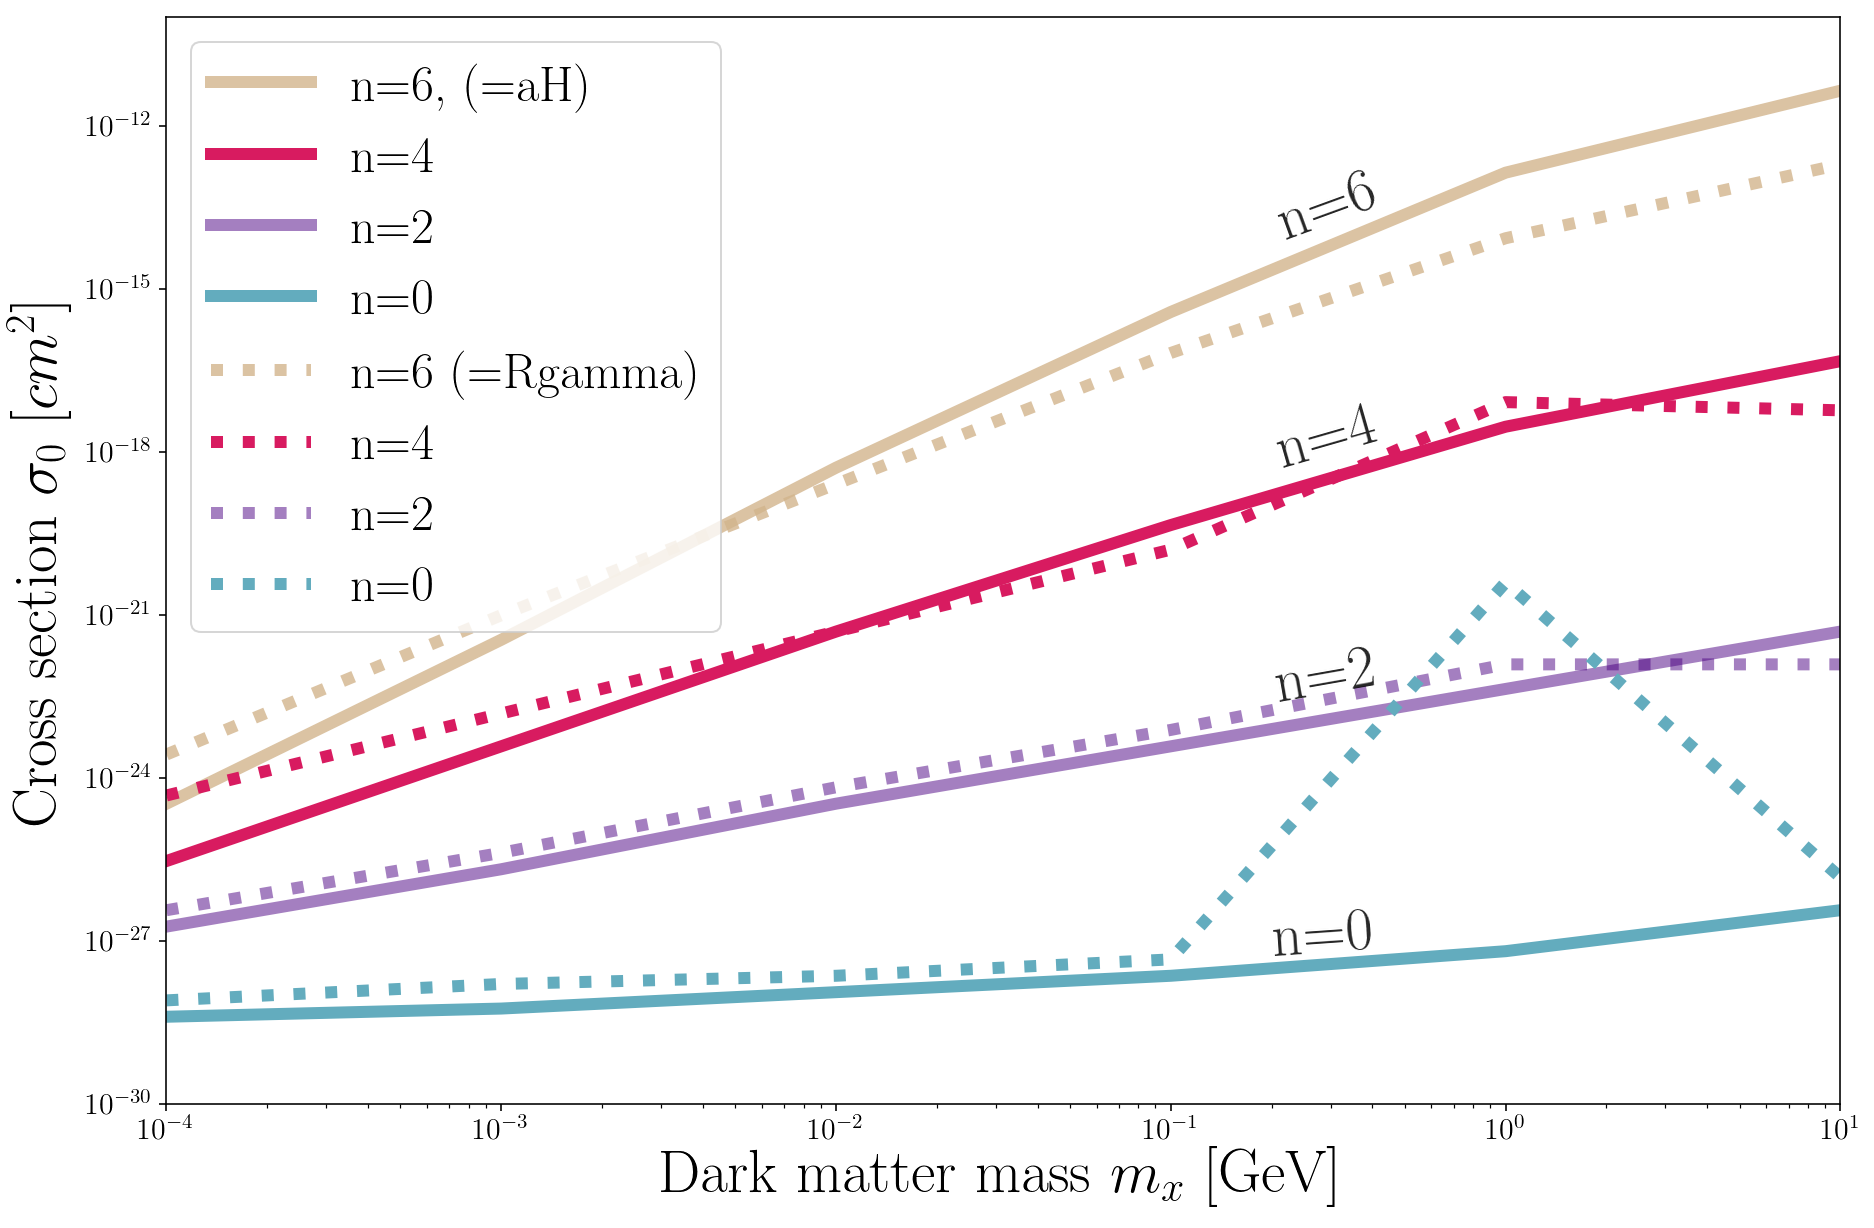

In [60]:
klim = vds0.mhm2khm(5*10**8)
plt.figure(figsize=(15,10))

plt.loglog(vds0.masses, vds0.sig(klim,6.), label="n=6, (=aH)",linewidth=6,c='tan',alpha=0.8)
plt.loglog(vds0.masses, vds0.sig(klim,4.), label="n=4",linewidth=6,c='#D81B60')
plt.loglog(vds0.masses, vds0.sig(klim,2.), label="n=2",linewidth=6,c='indigo',alpha=0.5)
plt.loglog(vds0.masses, vds0.sig(klim,0.), label="n=0",linewidth=6,c='#63acbe')

plt.loglog(vds0.masses, vds0.sig2(klim,6.), label="n=6 (=Rgamma)",linewidth=6,ls=':',c='tan',alpha=0.8)
plt.loglog(vds0.masses, vds0.sig2(klim,4.), label="n=4",linewidth=6,ls=':',c='#D81B60')
plt.loglog(vds0.masses, vds0.sig2(klim,2.), label="n=2",linewidth=6,ls=':',c='indigo',alpha=0.5)
plt.loglog(vds0.masses, vds0.sig2(klim,0.), label="n=0",linewidth=6,ls=':',c='#63acbe')

# plt.loglog(vds0.masses, vds0.sig(klim,-2.), label="n=-2",linewidth=5)
plt.text(0.2,3e-14,"n=6",rotation=20,fontsize=30,alpha=0.85)
plt.text(0.2,1.5e-18,"n=4",rotation=16,fontsize=30,alpha=0.85)
plt.text(0.2,5e-23,"n=2",rotation=10,fontsize=30,alpha=0.85)
plt.text(0.2,7e-28,"n=0",rotation=4,fontsize=30,alpha=0.85)

# plt.title(r"Analytical", fontsize=20)
plt.ylabel(r"Cross section $\sigma_0$ [$cm^2$]", fontsize=30)
plt.xlabel(r"Dark matter mass $m_x$ [GeV]", fontsize=30)
plt.legend(fontsize=25)
plt.tick_params(labelsize=15)
plt.ylim(1e-30,1e-10)
plt.xlim(1e-4,10)
plt.savefig("plots/limits/analytical.png")

#### Limits by exclusion curve

In [7]:
klim

30.50838144742533

In [8]:
sigs0cons = [5.2e-29,1.7e-28,1.4e-27]
sigs2cons = [3.5e-26,1.5e-23,9.8e-22]
sigs4cons = [4.6e-24,8.3e-19,1.45e-15]
sigs6cons = [3.1e-22,9.5e-13,1.6e-9]

sigs_2_anal = [vds0.sig(klim,-2.)[0],vds0.sig(klim,-2.)[2],vds0.sig(klim,-2.)[4]]
sigs0_anal = [vds0.sig(klim,0.)[0],vds0.sig(klim,0.)[2],vds0.sig(klim,0.)[4]]
sigs2_anal = [vds0.sig(klim,2.)[0],vds0.sig(klim,2.)[2],vds0.sig(klim,2.)[4]]
sigs4_anal = [vds0.sig(klim,4.)[0],vds0.sig(klim,4.)[2],vds0.sig(klim,4.)[4]]
sigs6_anal = [vds0.sig(klim,6.)[0],vds0.sig(klim,6.)[2],vds0.sig(klim,6.)[4]]

sigs0_eft = [8.8e-27,2.6e-26,1.5e-25,1.4e-23]
sigs2_eft = [4.2e-23,4.3e-21,5.3e-18,2.2e-15]
sigs4_eft = [1.6e-20,1.0e-16,4.1e-11,9.3e-09]
sigs6_eft = [5.0e-04,1.5e+00]

mass = [0.0001,0.01,1]
mass_eft = [1.5e-5,0.001,1,1000]
mass_eft6 = [1,1000]

In [9]:
n_2_limits = pd.DataFrame({'Mass (GeV)':mass,'$\sigma_0$ super conservative ($cm^2$)':sigs2cons,'$\sigma_0$ analytical ($cm^2$)':sigs_2_anal})
n0_limits = pd.DataFrame({'Mass (GeV)':mass,'$\sigma_0$ analytical ($cm^2$)':sigs0_anal})
n2_limits = pd.DataFrame({'Mass (GeV)':mass,'$\sigma_0$ super conservative ($cm^2$)':sigs2cons,'$\sigma_0$ analytical ($cm^2$)':sigs2_anal})
n4_limits = pd.DataFrame({'Mass (GeV)':mass,'$\sigma_0$ super conservative ($cm^2$)':sigs4cons,'$\sigma_0$ analytical ($cm^2$)':sigs4_anal})
n6_limits = pd.DataFrame({'Mass (GeV)':mass,'$\sigma_0$ super conservative ($cm^2$)':sigs6cons,'$\sigma_0$ analytical ($cm^2$)':sigs6_anal})
n6_limits

$\sigma_0$ analytical ($cm^2$)  $\sigma_0$ super conservative ($cm^2$)  \
0                    3.370064e-25                            3.100000e-22   
1                    5.111433e-19                            9.500000e-13   
2                    9.658832e-14                            1.600000e-09   

   Mass (GeV)  
0      0.0001  
1      0.0100  
2      1.0000

3.5938136638046403e-25
2.310129700083158e-24


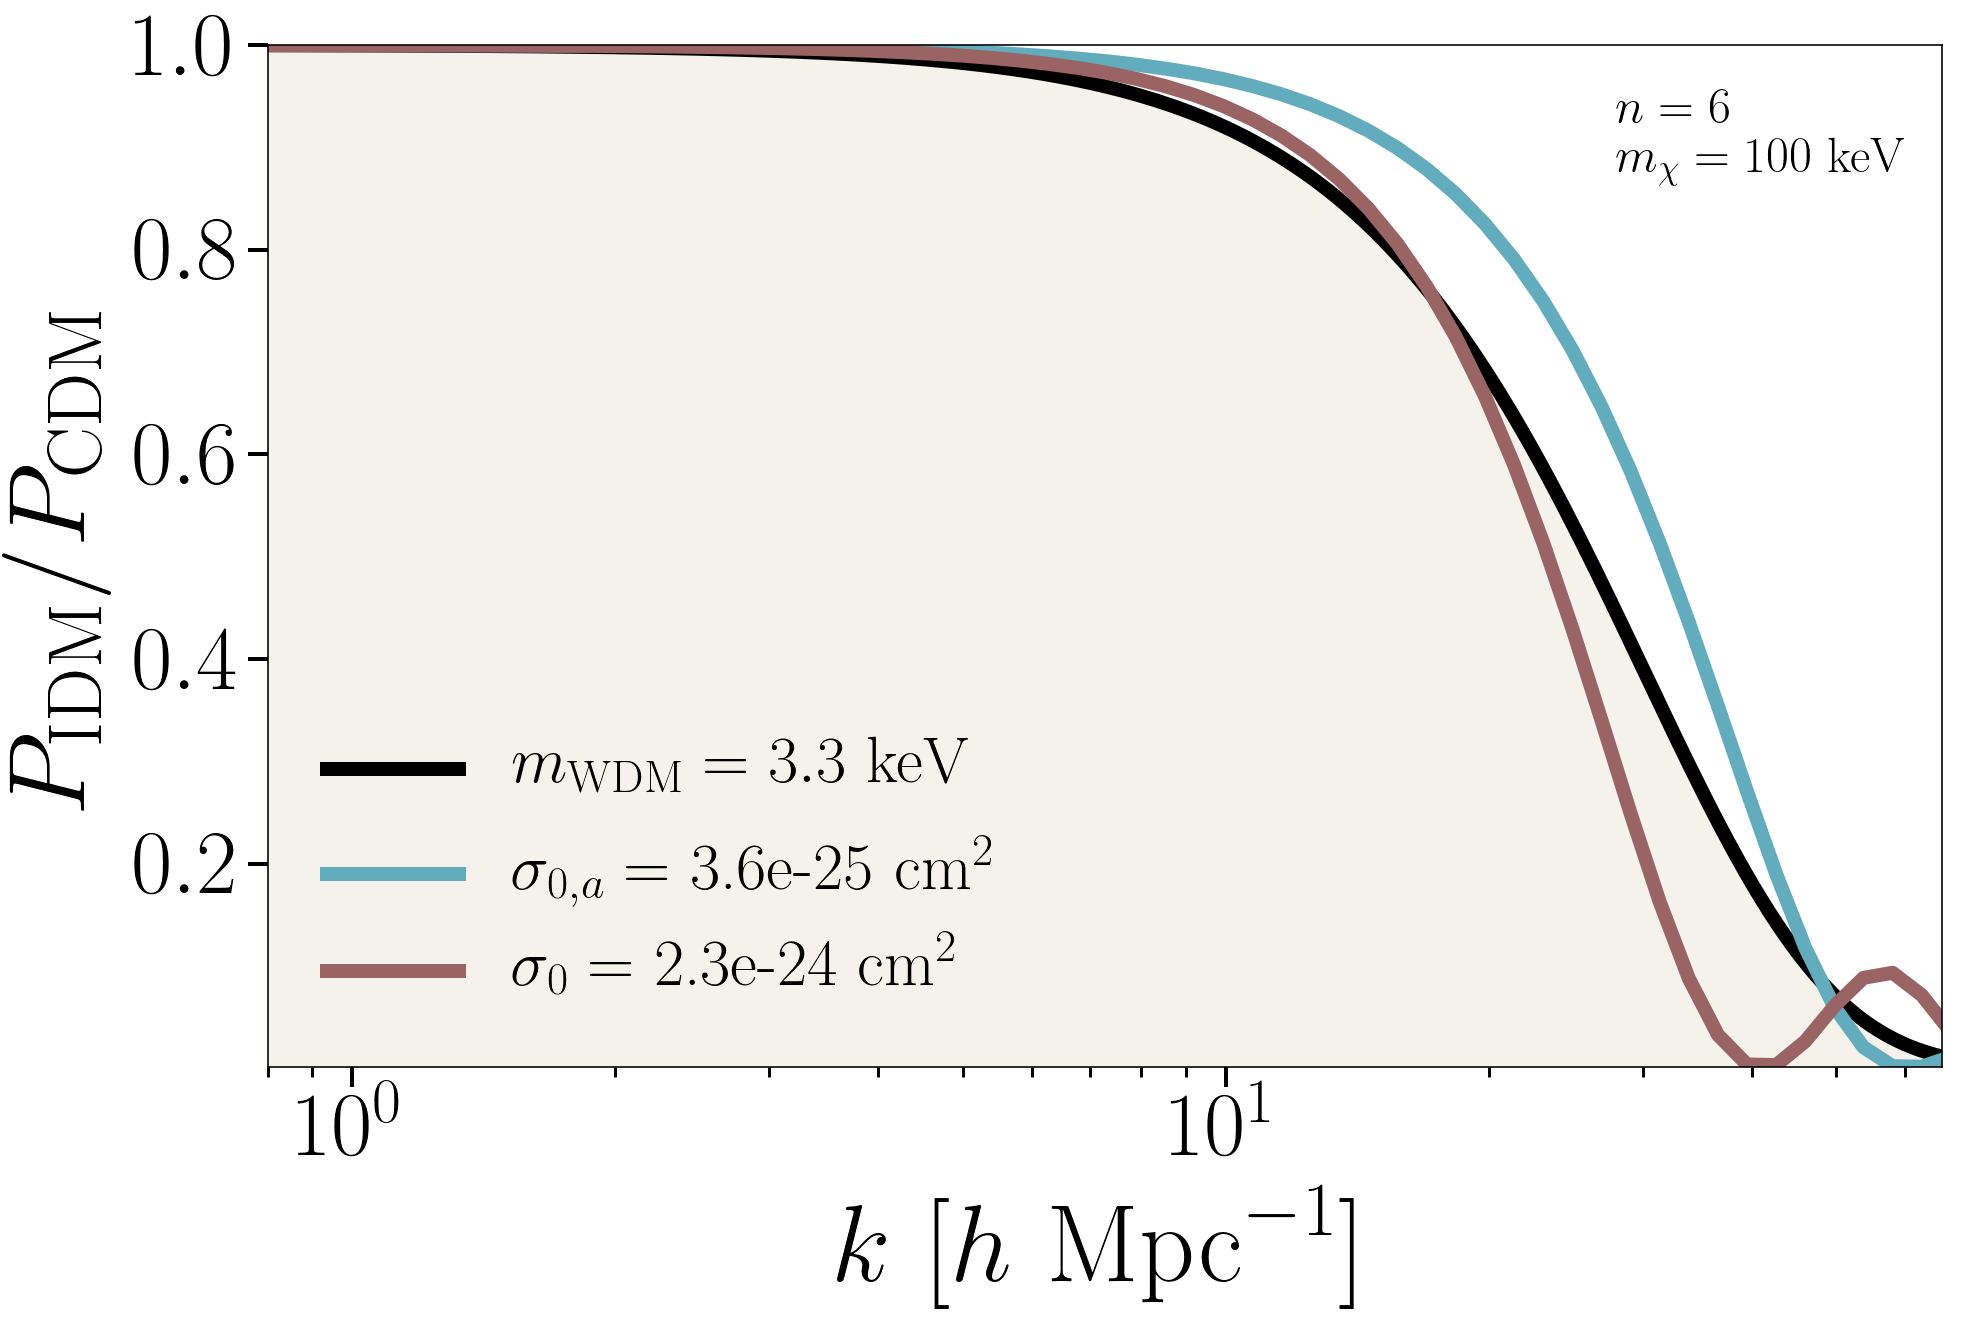

In [10]:
plt.figure(figsize=(15,10))

ks2 = np.logspace(-5,4,1000)
plt.semilogx(ks2,vds0.transfer(ks2,3.3)**2,linestyle='-',label=r'$m_{\rm{WDM}} = 3.3\ \rm{keV}$',c='k',lw=7)
# plt.text(20.5,0.65,"WDM",rotation=-59,fontsize=30,alpha=0.85)

###### n=-2 ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=-2,m=1,pltType='cons',sigmas=np.logspace(-5,-30,100),index=15,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=-2,m=1.0,pltType='analytic',sigmas=np.logspace(-27,-35,50),index=33,lw=7)
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=-2,m=0.01,pltType='cons',sigmas=largeSigs,index=10,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=-2,m=0.01,pltType='analytic',sigmas=np.logspace(-27,-35,50),index=26,lw=7)
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=-2,m=0.0001,pltType='cons',sigmas=np.logspace(-28,-35,100),index=70,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=-2,m=0.0001,pltType='analytic',sigmas=np.logspace(-27,-35,50),index=17,lw=7)

###### n=0 ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.0001,pltType='cons',sigmas=smallSigs,index=82,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=0,m=0.0001,pltType='analytic',sigmas=smallSigs,index=87,lw=7)
# plt.text(7.6,0.65,"Conservative",rotation=-61,fontsize=30,alpha=0.85)
# plt.text(16.2,0.65,"Analytic",rotation=-61,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=0$\n$m_{\chi}=100$ keV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.01,pltType='cons',sigmas=smallSigs,index=77,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=0,m=0.01,pltType='analytic',sigmas=smallSigs,index=82,lw=7)
# plt.text(7.4,0.65,"Conservative",rotation=-60,fontsize=30,alpha=0.85)
# plt.text(15.8,0.65,"Analytic",rotation=-58,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=0$\n$m_{\chi}=10$ MeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<25,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=1,pltType='cons',sigmas=smallSigs,index=68,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=0,m=1,pltType='analytic',sigmas=smallSigs,index=74,lw=7)
# plt.text(5.2,0.65,"Conservative",rotation=-56,fontsize=30,alpha=0.85)
# plt.text(12.8,0.65,"Analytic",rotation=-54,fontsize=30,alpha=0.85)
# plt.text(30,0.87,"$n=0$\n$m_{\chi}=1$ GeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

###### n=2 ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.0001,pltType='cons',sigmas=smallSigs,index=54,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=2,m=0.0001,pltType='analytic',sigmas=smallSigs,index=68,lw=7)
# plt.text(7.4,0.65,"Conservative",rotation=-70,fontsize=30,alpha=0.85)
# plt.text(25.2,0.65,"Analytic",rotation=-69,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=2$\n$m_{\chi}=100$ keV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<15,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<51,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.01,pltType='cons',sigmas=smallSigs,index=28,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=2,m=0.01,pltType='analytic',sigmas=smallSigs,index=45,lw=7)
# plt.text(5.3,0.65,"Conservative",rotation=-71,fontsize=30,alpha=0.85)
# plt.text(25.3,0.65,"Analytic",rotation=-70,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=2$\n$m_{\chi}=10$ MeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<11,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<51,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=1,pltType='cons',sigmas=smallSigs,index=10,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=2,m=1,pltType='analytic',sigmas=smallSigs,index=25,lw=7)
# plt.text(6.5,0.65,"Conservative",rotation=-67,fontsize=30,alpha=0.85)
# plt.text(26.0,0.65,"Analytic",rotation=-67,fontsize=30,alpha=0.85)
# plt.text(30,0.87,"$n=2$\n$m_{\chi}=1$ GeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<15,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<60,alpha=0.25)

# tk_idm,ks,sigma0 = vds0.single_tk(npow=2,m=1,label='$m_{\chi}=$ 1 GeV\n$\sigma_0=$ 2.2e-23 cm$^2$',colr='#8b3fa6',sigmas=smallSigs,index=25,lw=7)
# tk_idm,ks,sigma0 = vds0.single_tk(npow=2,m=0.01,label='$m_{\chi}=$ 10 MeV\n$\sigma_0=$ 1.7e-25 cm$^2$',colr='#63acbe',sigmas=smallSigs,index=45,lw=7)
# tk_idm,ks,sigma0 = vds0.single_tk(npow=2,m=0.0001,label='$m_{\chi}=$ 100 keV\n$\sigma_0=$ 1.3e-27 cm$^2$',colr='#D81B60',sigmas=smallSigs,index=68,lw=7,ls=':')
# tk_idm,ks,sigma0 = vds0.single_tk(npow=2,m=1,label='$m_{\chi}=$ 1 GeV\n$\sigma_0=$ 9.8e-22 cm$^2$',colr='#8b3fa6',sigmas=smallSigs,index=10,lw=7)
# tk_idm,ks,sigma0 = vds0.single_tk(npow=2,m=0.01,label='$m_{\chi}=$ 10 MeV\n$\sigma_0=$ 1.5e-23 cm$^2$',colr='#63acbe',sigmas=smallSigs,index=28,lw=7)
# tk_idm,ks,sigma0 = vds0.single_tk(npow=2,m=0.0001,label='$m_{\chi}=$ 100 keV\n$\sigma_0=$ 3.5e-26 cm$^2$',colr='#D81B60',sigmas=smallSigs,index=54,lw=7)

###### n=4 ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=1,pltType='cons',sigmas=np.logspace(-10,-30,30),index=7,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=4,m=1,pltType='analytic',sigmas=smallSigs2,index=6,lw=7)
# plt.text(5.1,0.65,"Conservative",rotation=-71,fontsize=30,alpha=0.85)
# plt.text(34.6,0.65,"Analytic",rotation=-71,fontsize=30,alpha=0.85)
# plt.text(30,0.87,"$n=4$\n$m_{\chi}=1$ GeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<10,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<75,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.01,pltType='cons',sigmas=np.logspace(-10,-30,100),index=40,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=4,m=0.01,pltType='analytic',sigmas=smallSigs2,index=35,lw=7)
# plt.text(3.8,0.65,"Conservative",rotation=-72.5,fontsize=30,alpha=0.85)
# plt.text(37.8,0.65,"Analytic",rotation=-72,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=4$\n$m_{\chi}=10$ MeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.0001,pltType='cons',sigmas=smallSigs,index=33,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=4,m=0.0001,pltType='analytic',sigmas=smallSigs2,index=68,lw=7)
# plt.text(7.5,0.65,"Conservative",rotation=-71.5,fontsize=30,alpha=0.85)
# plt.text(32.5,0.65,"Analytic",rotation=-68,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=4$\n$m_{\chi}=100$ keV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

###### n=6 ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=1,pltType='cons',sigmas=np.logspace(-5,-30,100),index=15,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=6,m=1,pltType='analytic',sigmas=largeSigs,index=15,lw=7)
# plt.text(4.2,0.65,"Conservative",rotation=-72,fontsize=30,alpha=0.85)
# plt.text(36.5,0.65,"Analytic",rotation=-72,fontsize=30,alpha=0.85)
# plt.text(30,0.87,"$n=6$\n$m_{\chi}=1$ GeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.01,pltType='cons',sigmas=largeSigs,index=10,lw=7)
# tk_idm_a,ks,sigma0 = vds0.single_tk(npow=6,m=0.01,pltType='analytic',sigmas=smallSigs2,index=13,lw=7)
# plt.text(1.5,0.65,"Conservative",rotation=-73,fontsize=30,alpha=0.85)
# plt.text(44.6,0.65,"Analytic",rotation=-74,fontsize=30,alpha=0.85)
# plt.text(28,0.87,"$n=6$\n$m_{\chi}=10$ MeV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.0001,pltType='cons',sigmas=np.logspace(-20,-30,100),index=5,lw=7)
tk_idm_a,ks,sigma0 = vds0.single_tk(npow=6,m=0.0001,pltType='analytic',sigmas=smallSigs,index=44,lw=7)
tk_idm_a,ks,sigma0 = vds0.single_tk(npow=6,m=0.0001,sigmas=smallSigs,index=36,lw=7)
# plt.text(4.8,0.65,"Conservative",rotation=-72,fontsize=30,alpha=0.85)
# plt.text(27.1,0.65,"Analytic",rotation=-67,fontsize=30,alpha=0.85)
plt.text(28,0.87,"$n=6$\n$m_{\chi}=100$ keV",fontsize=25)
# plt.fill_between(ks,tk_idm_c,0,color='#ccbe9f',where=ks<20,alpha=0.25)
# plt.fill_between(ks,tk_idm_a,0,color='#ccbe9f',where=ks<50,alpha=0.25)

# plt.fill_between(np.logspace(-5,4,1000), -10, vds0.transfer(ks2,3.3)**2,np.logspace(-5,4,1000) <=30,color='#ccbe9f',alpha=0.3)
plt.fill_between(np.logspace(-5,4,1000), -10, vds0.transfer(ks2,3.3)**2,color='#ccbe9f',alpha=0.20)
plt.xscale("log")
plt.xlim(0.8,66)
plt.ylim(0.001,1)
plt.ylabel(r'$P_{\rm{IDM}}/P_{\rm{CDM}}$',fontsize=55,labelpad=5)
plt.xlabel(r'$k$ [$h\ \rm{Mpc}^{-1}$]',fontsize=55,labelpad=5)
plt.tick_params(labelsize=45,length=10,width=2)
plt.tick_params(which='minor',length=5,width=1.5)
plt.legend(fontsize=33,framealpha=0,loc='lower left')
plt.subplots_adjust(bottom=0.17)

# plt.savefig("plots/exclusions/n6_m100kev.png")

In [11]:
vds0.sig2(klim,6)

array([2.70495973e-24, 9.88495905e-22, 2.55290807e-19, 6.59318827e-17,
       8.50448934e-15, 1.93389175e-13])

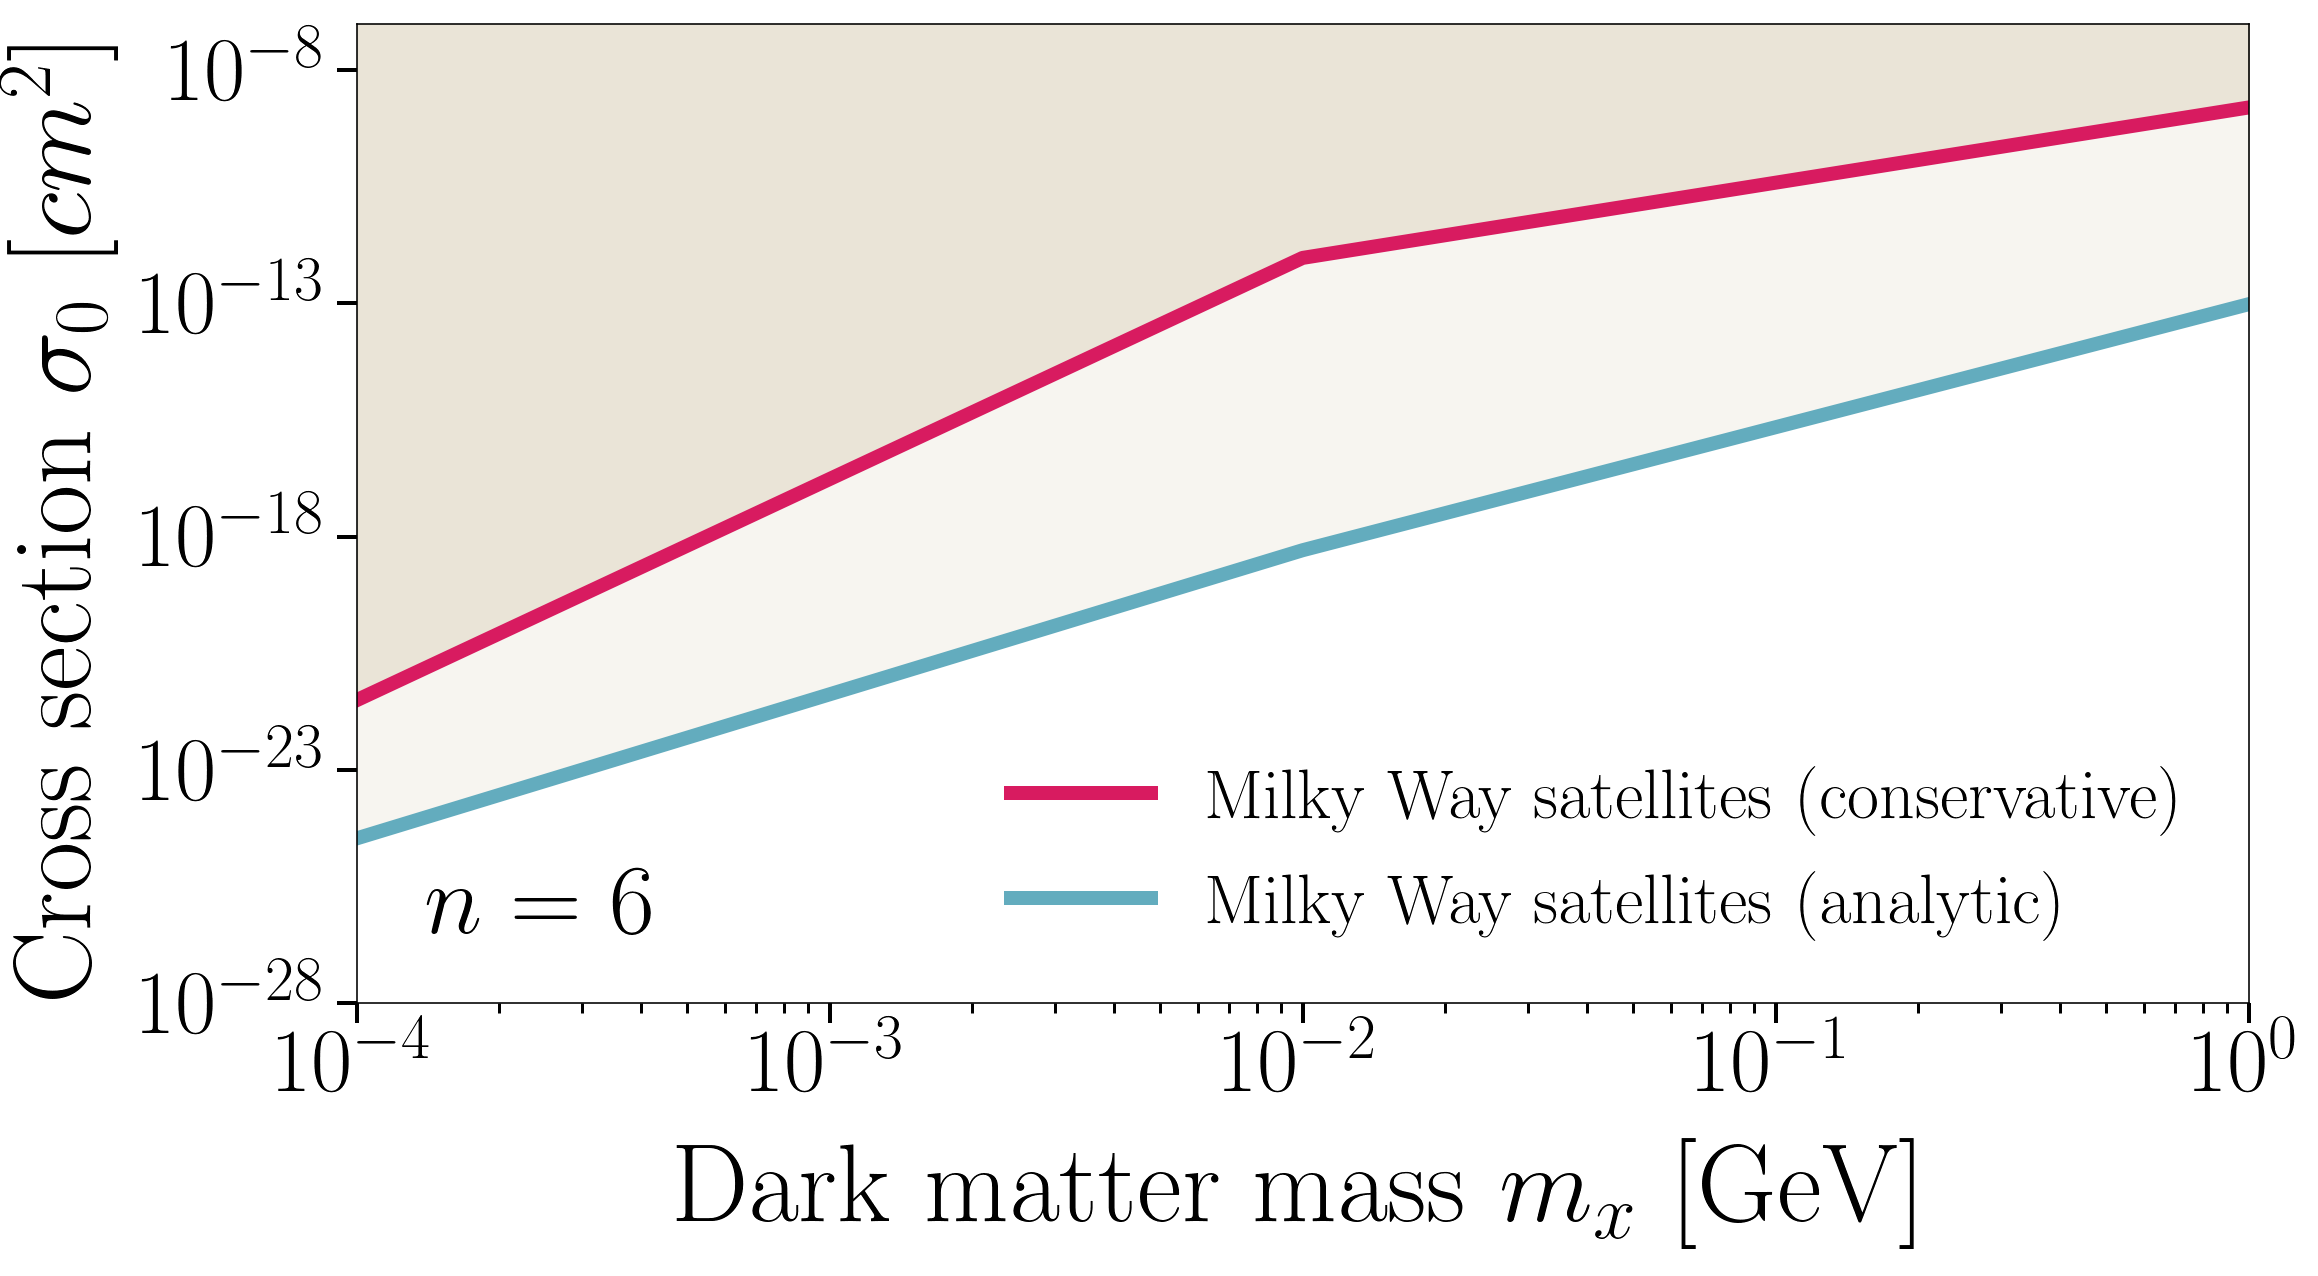

In [12]:
plt.figure(figsize=(18,10))

###### n=0 ######
# plt.loglog(mass_eft,sigs0_eft,label="CMB",linestyle='-',c='k',lw=7)
# plt.loglog(mass,sigs0cons,label="Milky Way satellites (conservative)",linestyle='-',c='#D81B60',lw=7)
# plt.loglog(mass, sigs0_anal,label="Milky Way satellites (analytic)",lw=7,linestyle='-',c='#63acbe')
# plt.fill_between(mass, sigs0_anal, 1, color='#ccbe9f', alpha=0.15)
# plt.fill_between(mass, sigs0cons, 1, color='#ccbe9f', alpha=0.3)
# plt.text(1.4e-4,3e-31,"$n=0$",fontsize=50)
# plt.ylim(1e-31,1e-24)

###### n=2 ######
# plt.loglog(mass_eft,sigs2_eft,label="CMB",linestyle='-',c='k',lw=7)
# plt.loglog(mass,sigs2cons,label="Milky Way satellites (conservative)",linestyle='-',c='#D81B60',lw=7)
# plt.loglog(mass, sigs2_anal, label="Milky Way satellites (analytic)",lw=7,linestyle='-',c='#63acbe')
# plt.fill_between(mass, sigs2_anal, 1, color='#ccbe9f', alpha=0.15)
# plt.fill_between(mass, sigs2cons, 1, color='#ccbe9f', alpha=0.3)
# plt.text(1.4e-4,1e-30,"$n=2$",fontsize=50)
# plt.yticks([1e-30,1e-27,1e-24,1e-21,1e-18],["$10^{-30}$","$10^{-27}$","$10^{-24}$","$10^{-21}$","$10^{-18}$"])
# plt.ylim(1e-31,1e-17)

###### n=4 ######
# plt.loglog(mass_eft,sigs4_eft,label="CMB",linestyle='-',c='k',lw=7)
# plt.loglog(mass,sigs4cons,label="Milky Way satellites (conservative)",linestyle='-',c='#D81B60',lw=7)
# plt.loglog(mass, sigs4_anal, label="Milky Way satellites (analytic)",lw=7,linestyle='-',c='#63acbe')
# plt.fill_between(mass, sigs4_anal, 1, color='#ccbe9f', alpha=0.15)
# plt.fill_between(mass, sigs4cons, 1, color='#ccbe9f', alpha=0.3)
# plt.text(1.4e-4,3e-30,"$n=4$",fontsize=50)
# plt.ylim(1e-31,1e-9)

###### n=6 ######
plt.loglog(mass,sigs6cons,label="Milky Way satellites (conservative)",linestyle='-',c='#D81B60',lw=7)
plt.loglog(mass, sigs6_anal, label="Milky Way satellites (analytic)",lw=7,linestyle='-',c='#63acbe')
plt.fill_between(mass, sigs6_anal, 1, color='#ccbe9f', alpha=0.15)
plt.fill_between(mass, sigs6cons, 1, color='#ccbe9f', alpha=0.3)
plt.text(1.4e-4,3e-27,"$n=6$",fontsize=50)
plt.ylim(1e-28,1e-7)

plt.xlim(1e-4,1)
plt.ylabel(r"Cross section $\sigma_0$ [$cm^2$]",fontsize=55,labelpad=5)
plt.xlabel(r"Dark matter mass $m_x$ [GeV]",fontsize=55,labelpad=20)
plt.legend(fontsize=35,loc='lower right',framealpha=0)
plt.tick_params(labelsize=45,length=10,width=2)
plt.tick_params(which='minor',length=5,width=1.5)

plt.subplots_adjust(left=0.17,bottom=0.20)
# plt.savefig("plots/limits/limits_n0_CAE.png")
# plt.savefig("plots/limits/limits_n2_CAE.png")
# plt.savefig("plots/limits/limits_n4_CAE.png")
plt.savefig("plots/limits/limits_n6_CA.png")

---

---

---

# Transfer function business

9.32603346883218e-24
9.32603346883218e-24
9.32603346883218e-24
9.32603346883218e-24


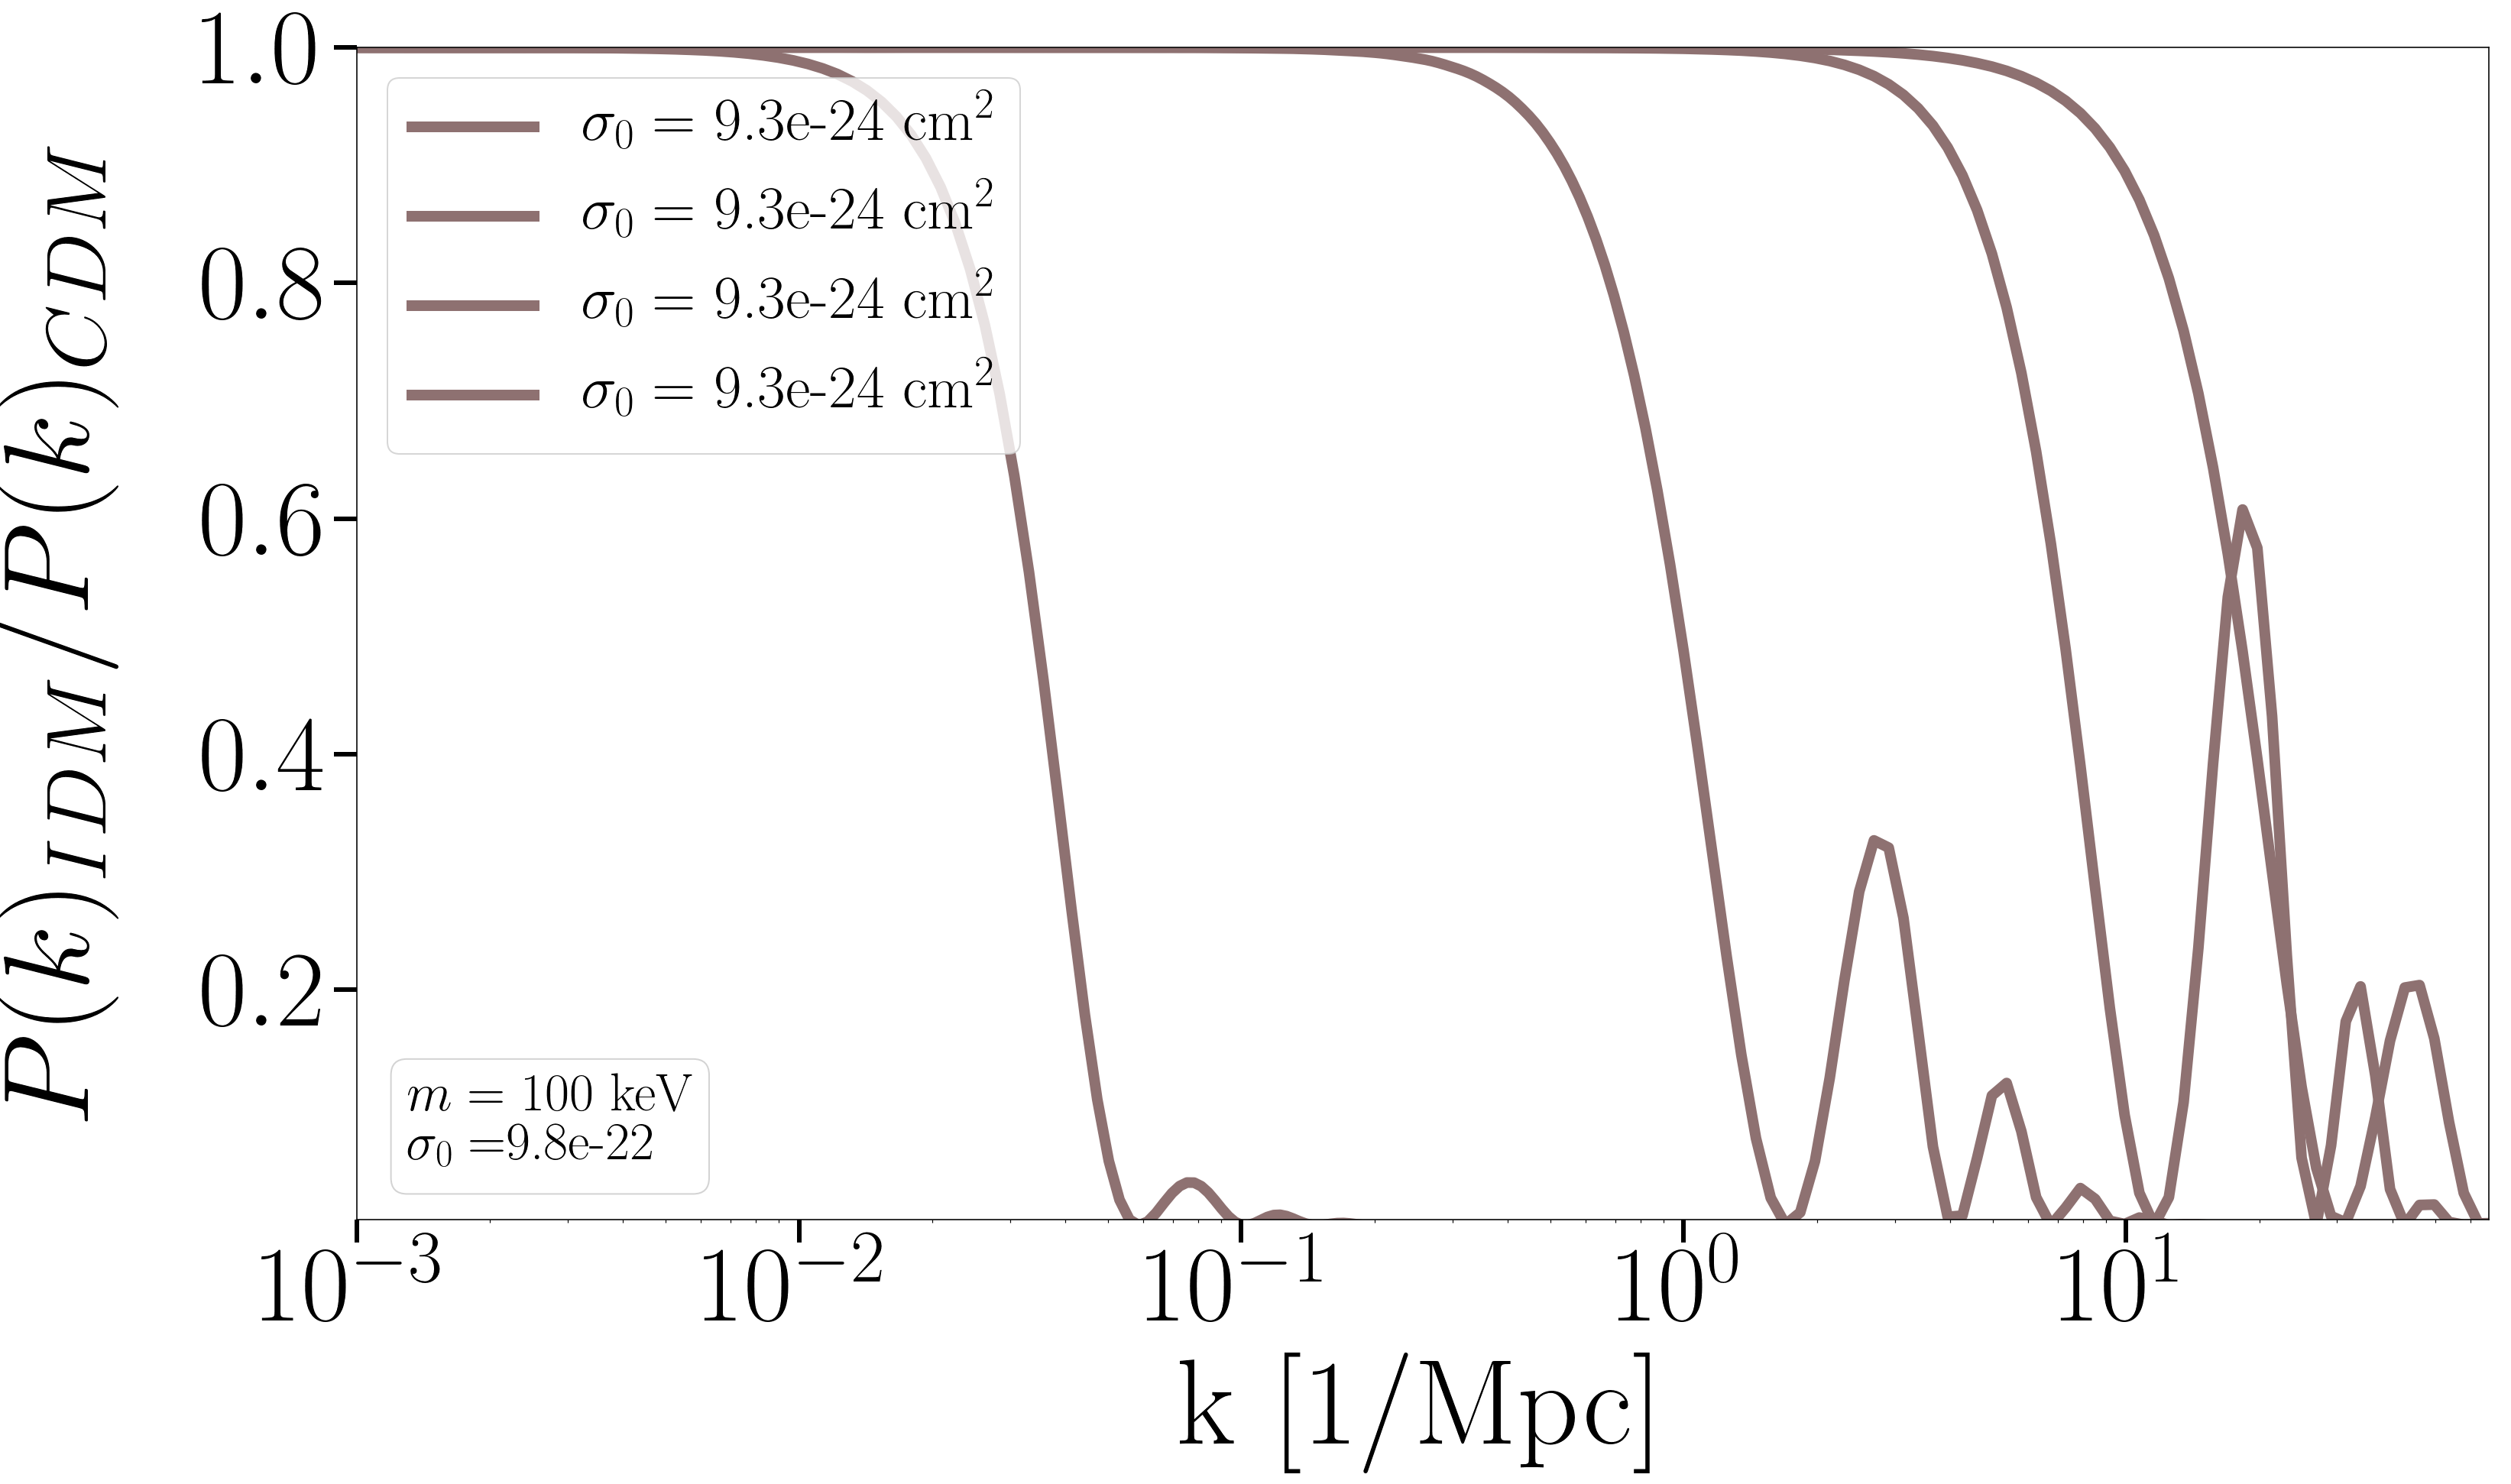

In [13]:
plt.figure(figsize=(25,15))    
plt.xscale('log')
plt.xlim(1e-3,66)
plt.ylim(0.005,1)
plt.ylabel(r"$P(k)_{IDM}/P(k)_{CDM}$", fontsize=80,labelpad=45)
plt.xlabel(r"k [1/Mpc]", fontsize=80)
plt.tick_params(labelsize=70,length=15,width=3)

mass = 0.0001
indx = 30
c1 = (math.sqrt((1+10.))/10,1-math.sqrt((1+10.))/10,1-math.sqrt((1+10.))/10)
c2 = (math.sqrt((1+40.))/10,1-math.sqrt((1+40.))/10,1-math.sqrt((1+40.))/10)
c3 = (math.sqrt((1+70.))/10,1-math.sqrt((1+70.))/10,1-math.sqrt((1+70.))/10)

tk_idm,ks,sigma0 = vds0.single_tk(label='$n=0$',npow=0,m=mass,colr=c1,sigmas=smallSigs,index=indx,lw=7)
tk_idm,ks,sigma0 = vds0.single_tk(label='$n=2$',npow=2,m=mass,colr=c2,sigmas=smallSigs,index=indx,lw=7)
tk_idm,ks,sigma0 = vds0.single_tk(label='$n=4$',npow=4,m=mass,colr=c3,sigmas=smallSigs,index=indx,lw=7)
tk_idm,ks,sigma0 = vds0.single_tk(label='$n=6$',npow=6,m=mass,colr='tan',sigmas=smallSigs,index=indx,lw=7)

# plt.axvline(12,lw=10)
plt.legend(fontsize=40,loc='upper left')
plt.text(1.3e-3,0.05,"$m=100$ keV\n$\sigma_0=$9.8e-22",fontsize=35,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round'))
plt.subplots_adjust(bottom=0.17)
# plt.savefig("plots/tk/tk_all_n2.png",dpi=200)

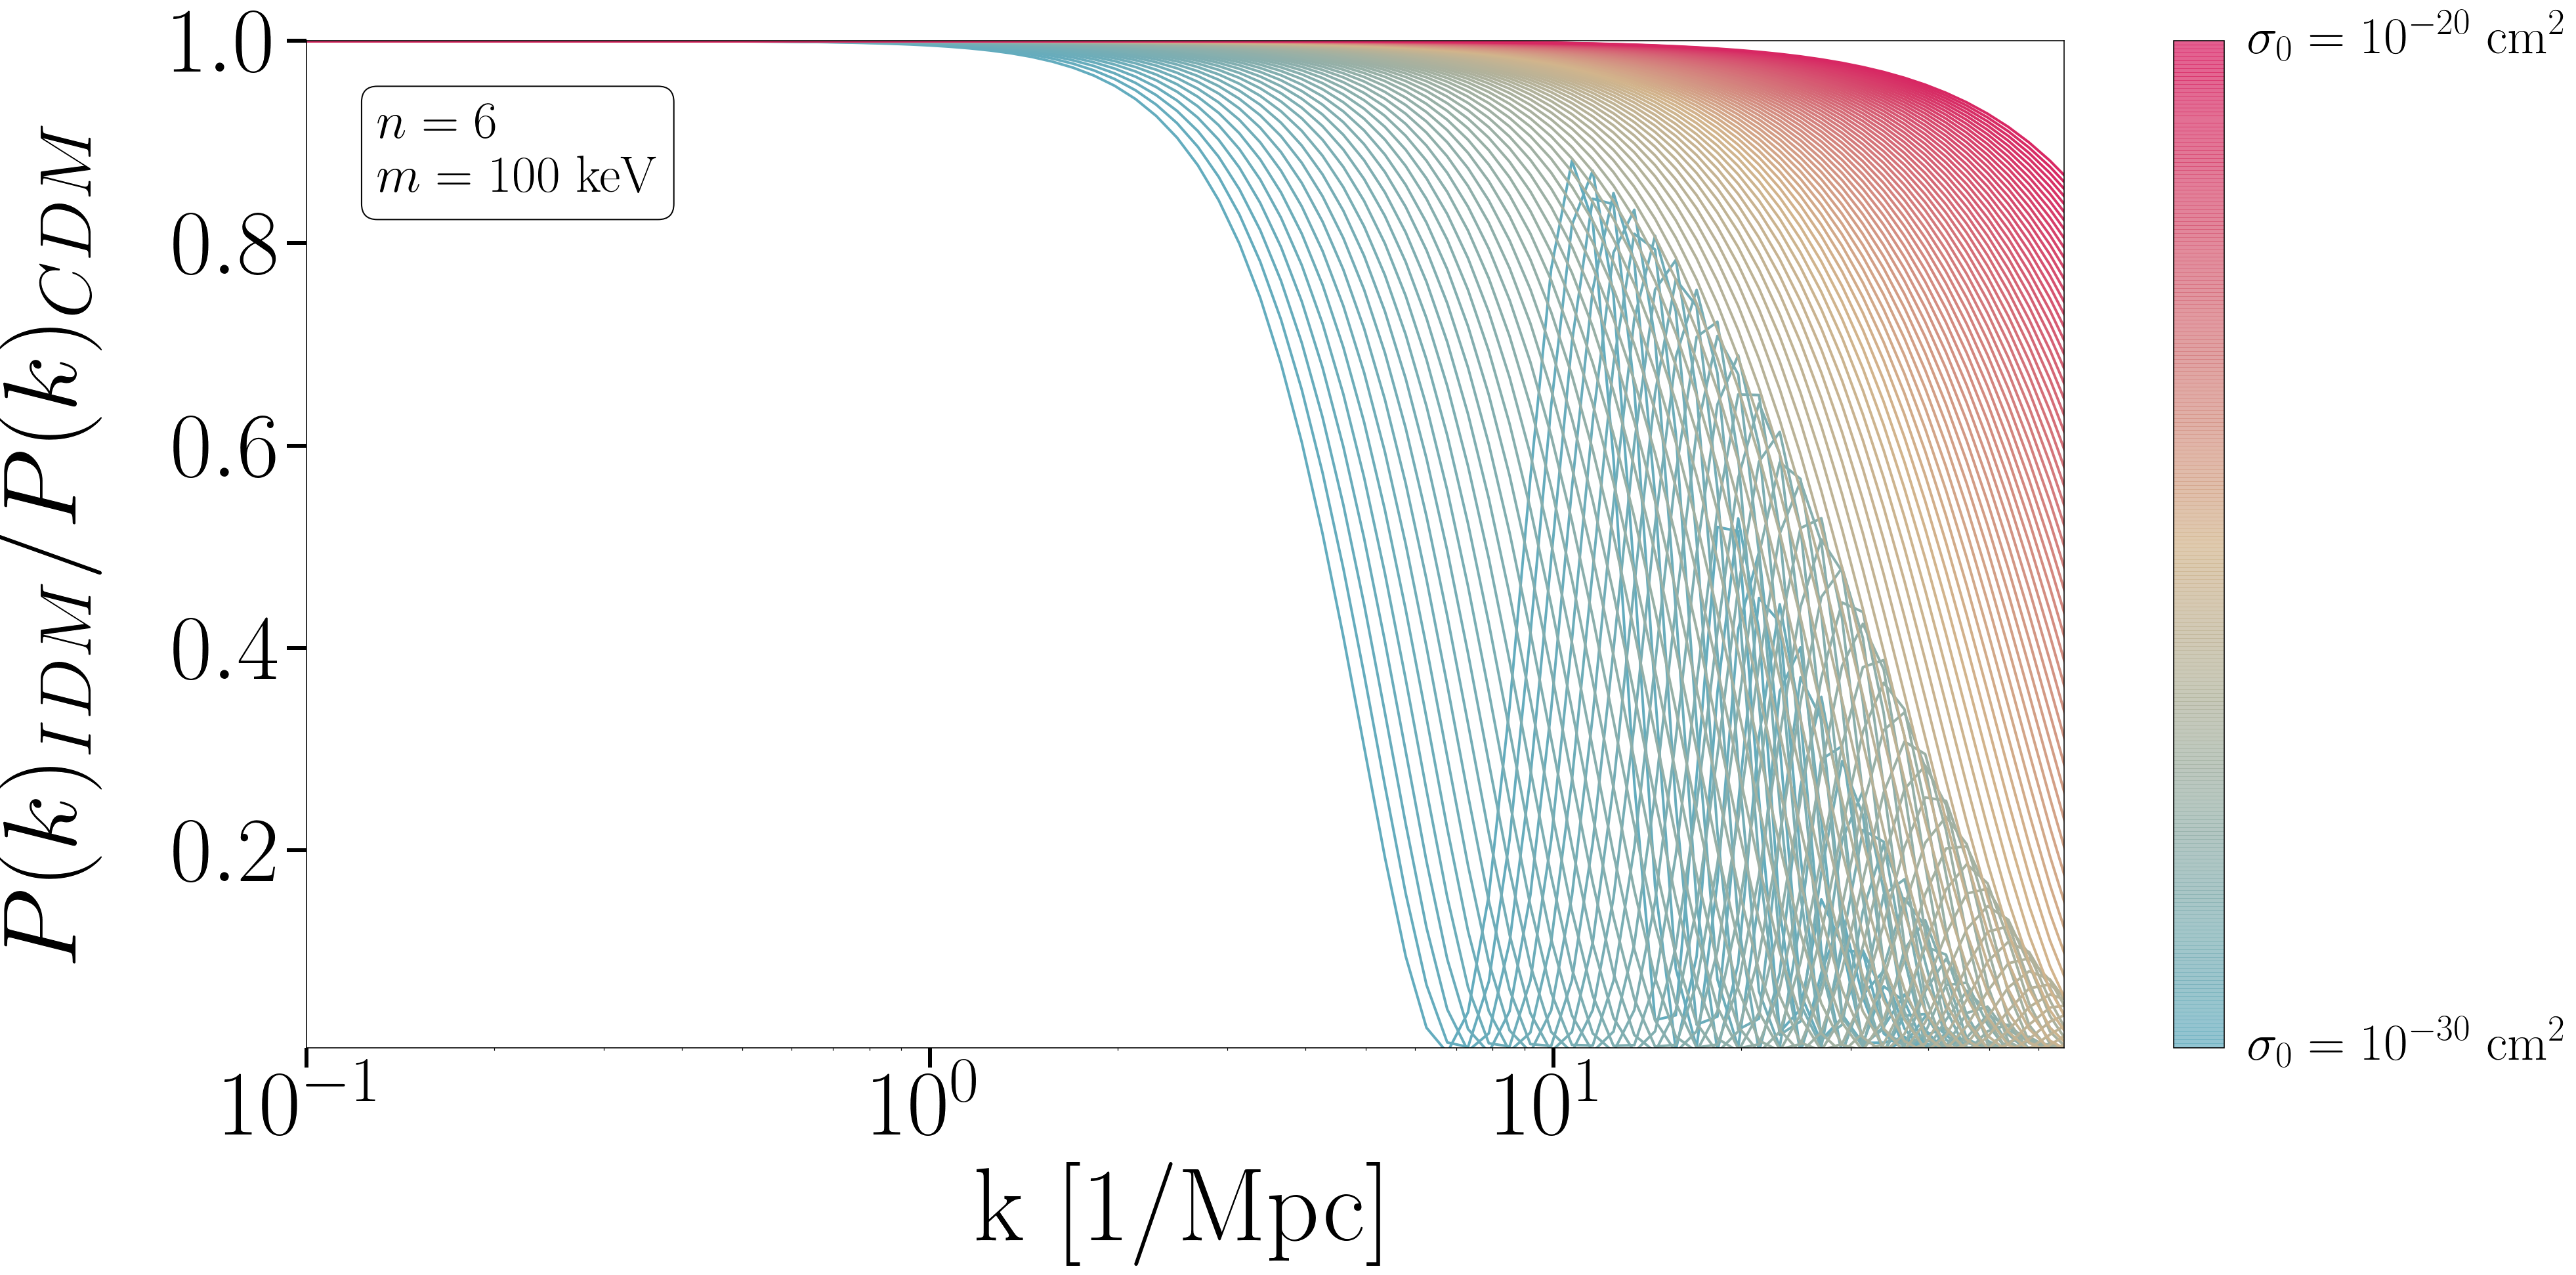

In [14]:
plt.figure(figsize=(30,15))    
plt.xscale('log')
plt.xlim(1e-1,66)
plt.ylim(0.005,1)
plt.ylabel(r"$P(k)_{IDM}/P(k)_{CDM}$", fontsize=80,labelpad=45)
plt.xlabel(r"k [1/Mpc]", fontsize=80)
plt.tick_params(labelsize=70,length=15,width=3)
plt.text(1.3e-1,0.85,"$n=6$\n$m=100$ keV",fontsize=40,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
vds0.all_sigmas(colorbar=True,npow=6,m=0.0001,sigmas=smallSigs,lw=2)
plt.subplots_adjust(bottom=0.17)
plt.savefig("plots/tk/tk_all_n6m100kev.png")

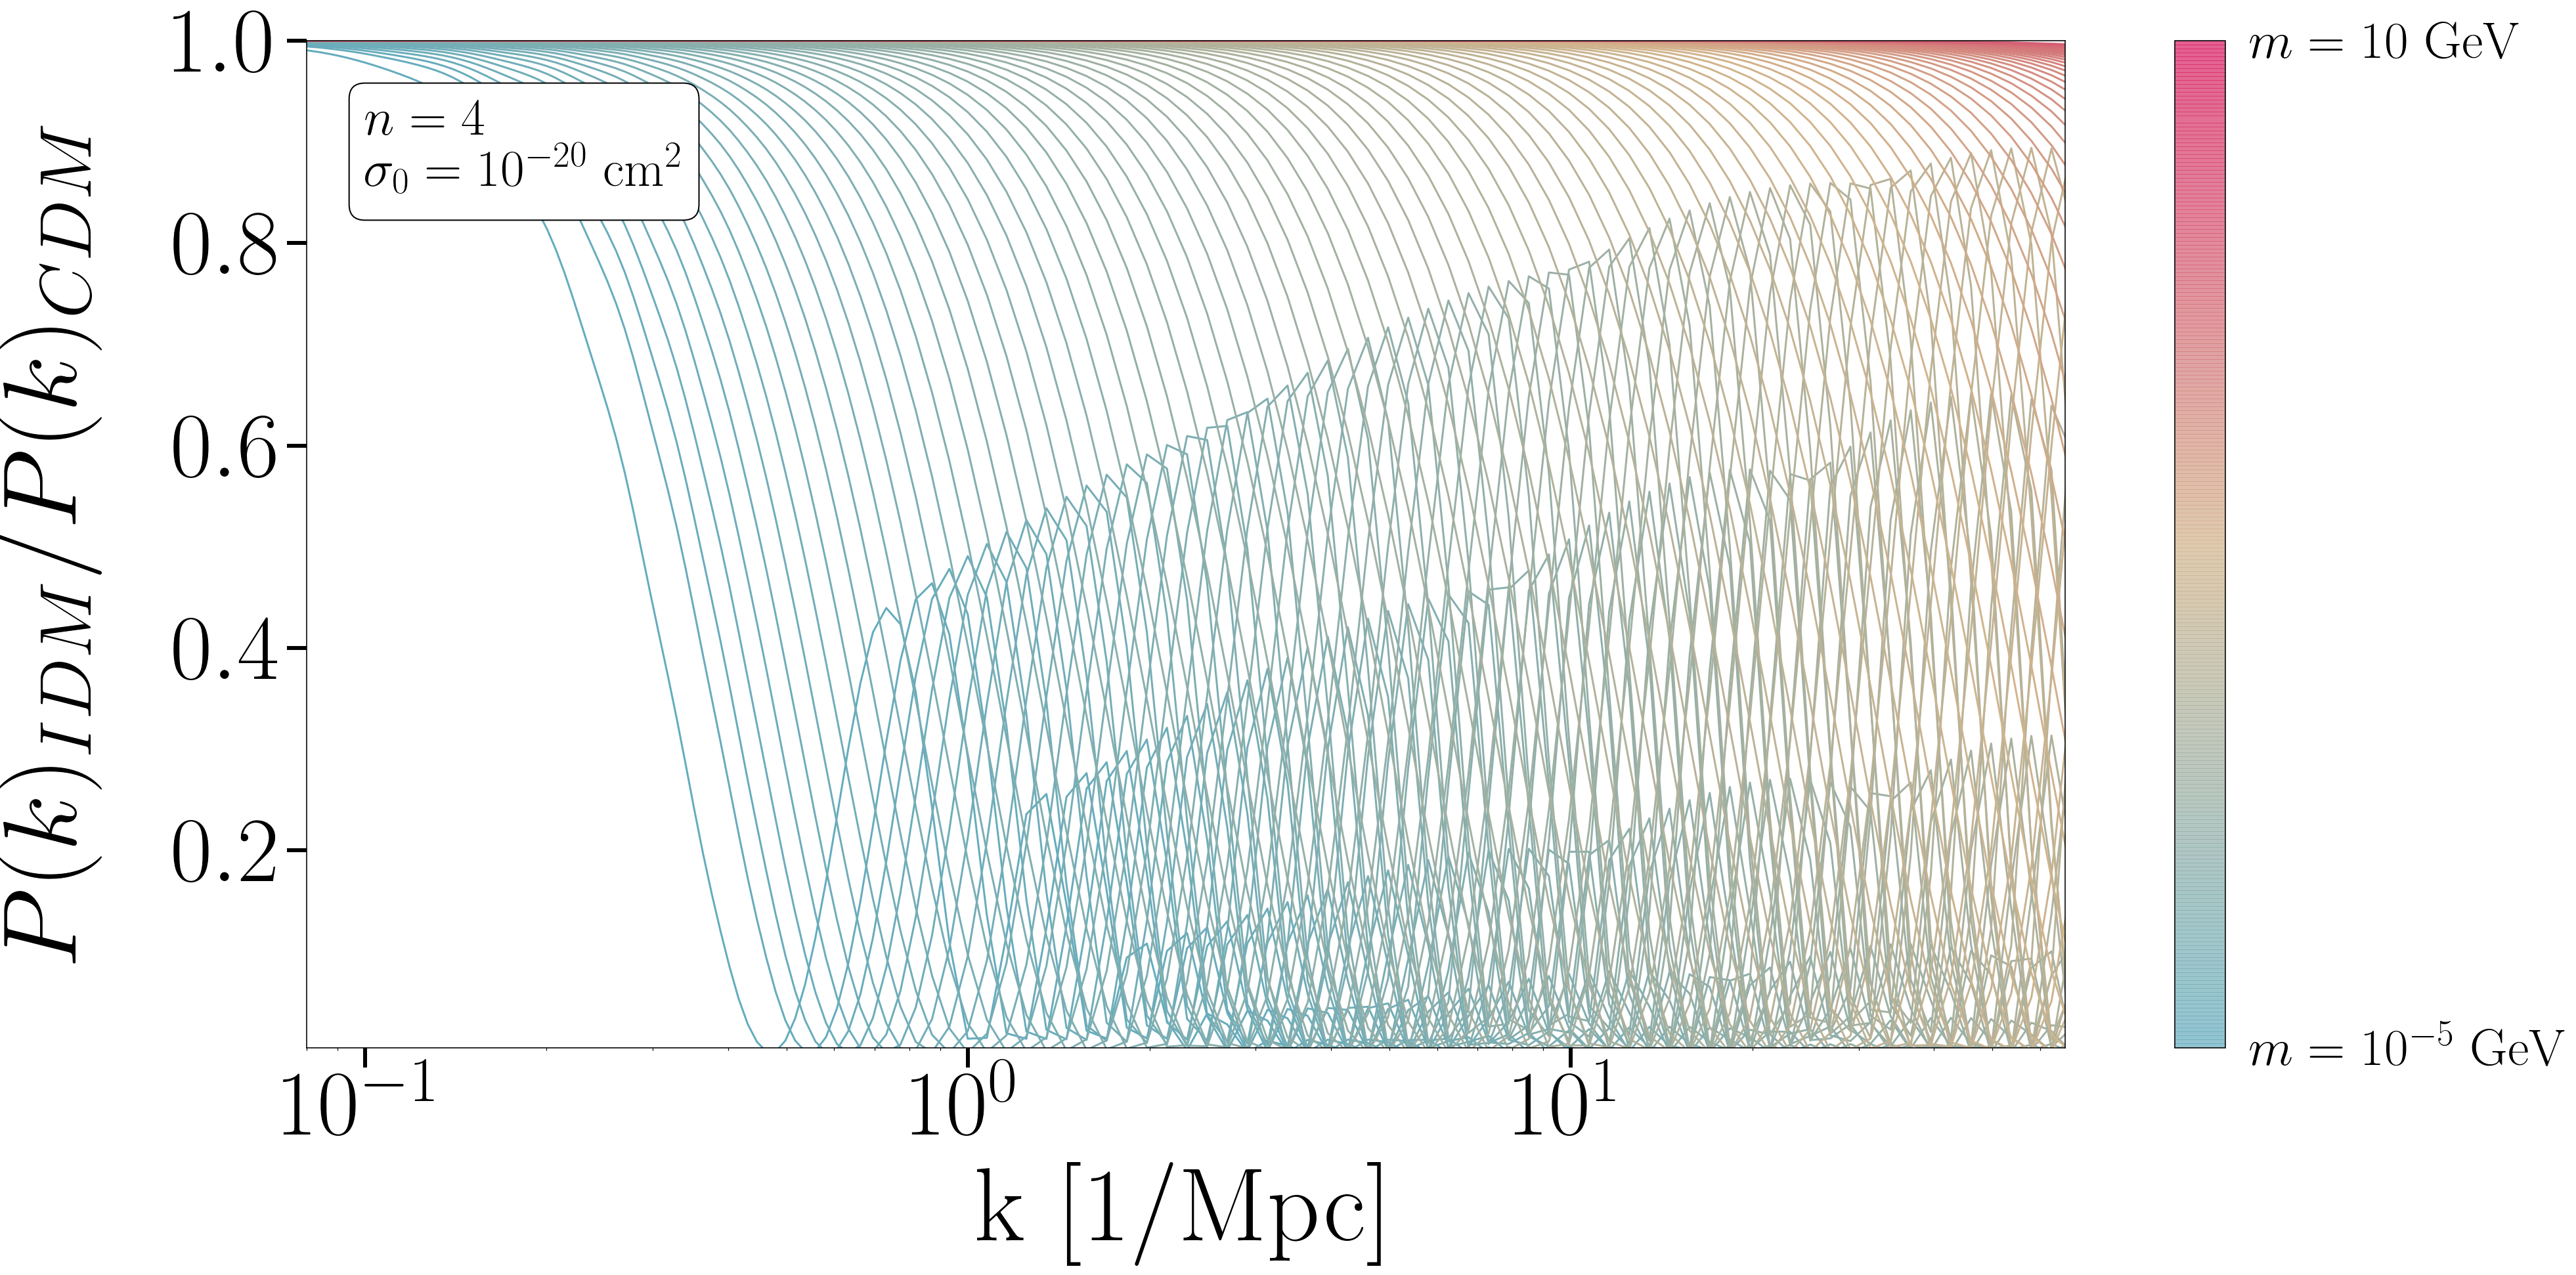

In [15]:
plt.figure(figsize=(30,15))    
plt.xscale('log')
plt.xlim(8e-2,66)
plt.ylim(0.005,1)
plt.ylabel(r"$P(k)_{IDM}/P(k)_{CDM}$", fontsize=80,labelpad=45)
plt.xlabel(r"k [1/Mpc]", fontsize=80)
plt.tick_params(labelsize=70,length=15,width=3)
# plt.plot(-10,-10,c='y',label='100 keV')
# plt.plot(-10,-10,c='b',label='10 MeV')
# plt.plot(-10,-10,c='r',label='1 GeV')
# plt.plot(-10,-10,c='k',label='Peak (28 MeV)')
# plt.legend(fontsize=40)
plt.text(1e-1,0.85,"$n=4$\n$\sigma_0=10^{-20}$ cm$^2$",fontsize=40,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
vds0.all_masses(masses=np.logspace(-5,1,100),sigma=1e-20,colorbar=True,npow=4,lw=2)
plt.subplots_adjust(bottom=0.17)
plt.savefig("plots/tk/tk_all_n4s1em20.png")

# Other

#### Peak fitting

In [16]:
k1,tk1,s1 = vds0.peaks(npow=1)
k2,tk2,s2 = vds0.peaks(npow=2)
k3,tk3,s3 = vds0.peaks(npow=3)
k4,tk4,s4 = vds0.peaks(npow=4)
k5,tk5,s5 = vds0.peaks(npow=5)
k6,tk6,s6 = vds0.peaks(npow=6)
k8,tk8,s8 = vds0.peaks(npow=8)
k10,tk10,s10 = vds0.peaks(npow=10)

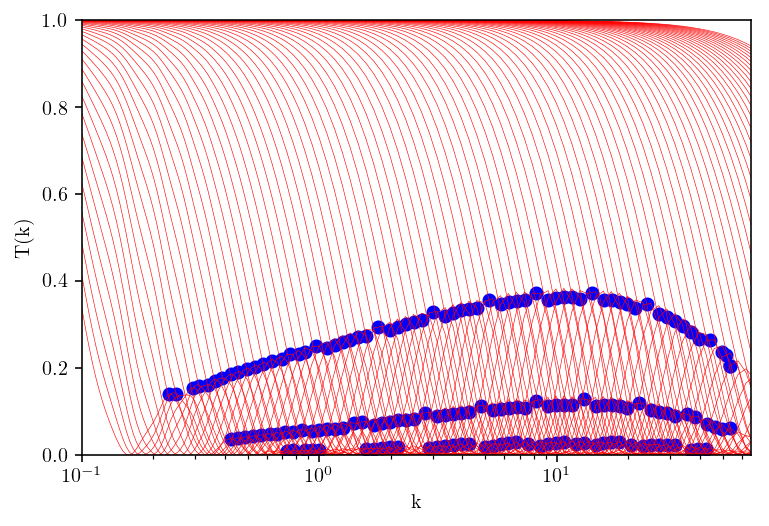

In [17]:
for i in range(len(tk2)):
    for j in range(len(tk2[i])):
        try: plt.scatter(k2[i][j],tk2[i][j],c='b')
        except: continue

plt.scatter(k2[0][0],tk2[0][0],c='b',label='n=2')
# plt.xscale('log')
plt.xlim(1e-1,66)
plt.ylim(0,1)
plt.xlabel("k")
plt.ylabel("T(k)")
# plt.legend()
vds0.all_sigmas(npow=2,m=0.0001,sigmas=smallSigs,lw=0.3)

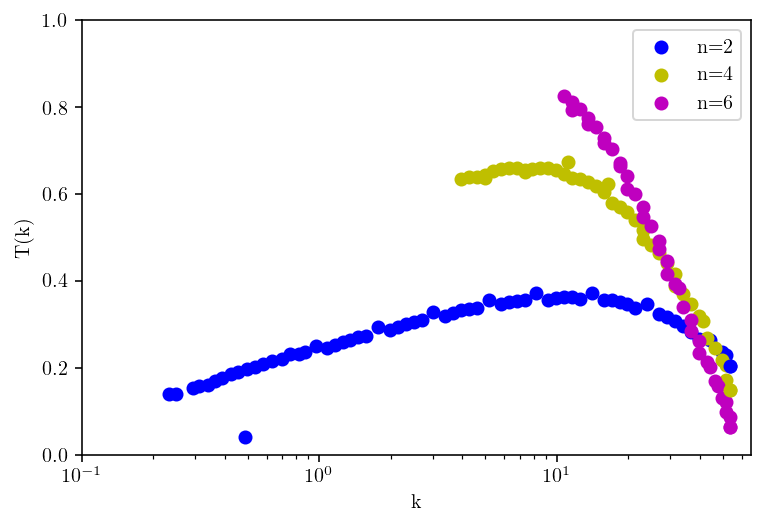

In [18]:
for i in range(len(tk2)):
    try: plt.scatter(k2[i][0],tk2[i][0],c='b')
    except: continue
for i in range(len(tk4)):
    try: plt.scatter(k4[i][0],tk4[i][0],c='y')
    except: continue
for i in range(len(tk6)):
    try: plt.scatter(k6[i][0],tk6[i][0],c='m')
    except: continue  

plt.scatter(k2[0][0],tk2[0][0],c='b',label="n=2")
plt.scatter(k4[0][0],tk4[0][0],c='y',label="n=4")
plt.scatter(k6[0][0],tk6[0][0],c='m',label="n=6")

plt.xscale('log')
plt.xlim(1e-1,66)
plt.ylim(0,1)
plt.xlabel("k")
plt.ylabel("T(k)")
plt.legend()
# vds0.all_sigmas(npow=2,m=0.0001,sigmas=smallSigs,lw=0.3)  
# vds0.all_sigmas(npow=4,m=0.0001,sigmas=smallSigs,lw=0.3)            
# vds0.all_sigmas(npow=6,m=0.0001,sigmas=smallSigs,lw=0.3)            

Fitting expression: $\frac{log(k+2.3)}{\alpha1.09^{kn/10}}$

In [19]:
params2 = [2.3,2,1.09,10]
params4 = [2.3,4,1.09,5]
params6 = [2.3,6,1.09,3.3]
params8 = [2.3,8.,1.09,2]

In [20]:
def logpow(x,a,npow,n,m):
    aa = (np.log(x)+a)/(m*np.power(n,(x*npow)/10))
    return (aa)

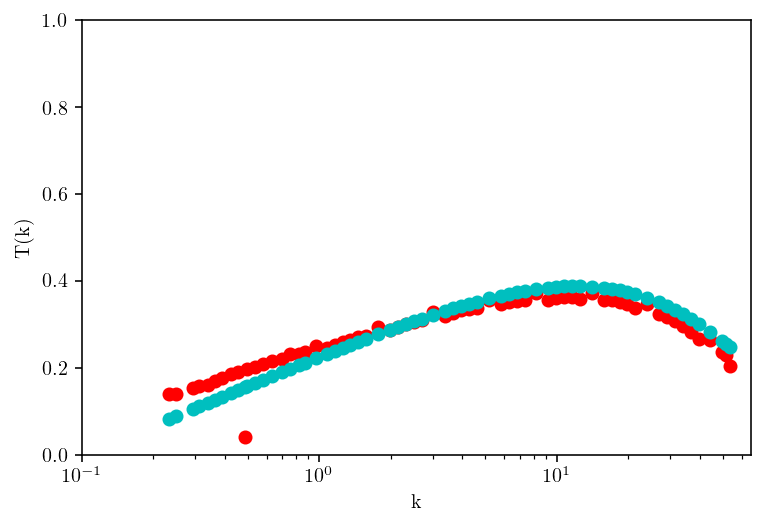

In [21]:
for i in range(len(tk2)):
    plt.scatter(k2[i][0],tk2[i][0],c='r')
for i in range(len(tk2)):
    plt.scatter([row[0] for row in k2][i],logpow(np.array([row[0] for row in k2][i]),*params2),c='c')
plt.xlim(1e-1,66)
plt.ylim(0,1)
plt.xlabel("k")
plt.ylabel("T(k)")
plt.xscale('log')

Text(0.11,-0.1,'Plot of first peak amplitude for n=1,2,4,6 (black=1 ...\n magenta=6) at similar $\\sigma_0$ (8e-21). Larger ns are further\n along in evolution')

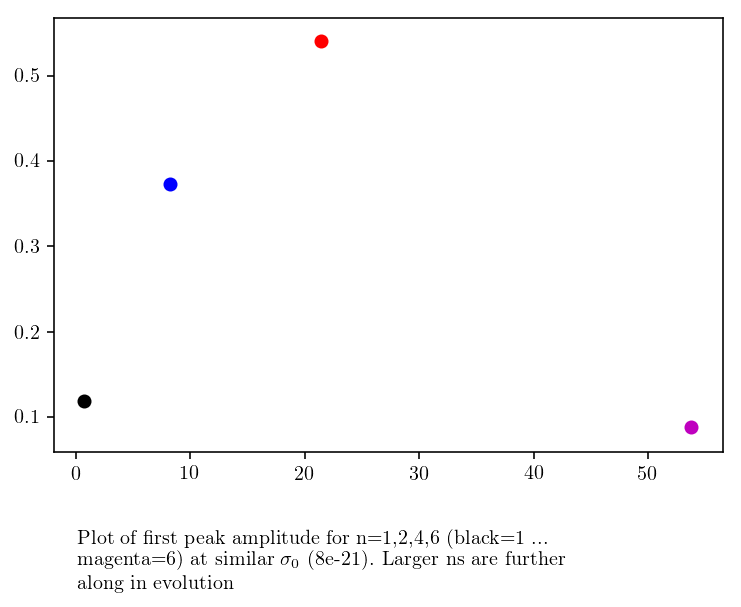

In [22]:
plt.scatter(k1[3][0],tk1[3][0],c='k',label='n1')
plt.scatter(k2[22][0],tk2[22][0],c='b',label='n2')
plt.scatter(k4[17][0],tk4[17][0],c='r',label='n4')
plt.scatter(k6[1][0],tk6[1][0],c='m',label='n6')
plt.text(1.1e-1,-0.1,"Plot of first peak amplitude for n=1,2,4,6 (black=1 ...\n magenta=6) at similar $\sigma_0$ (8e-21). Larger ns are further\n along in evolution")

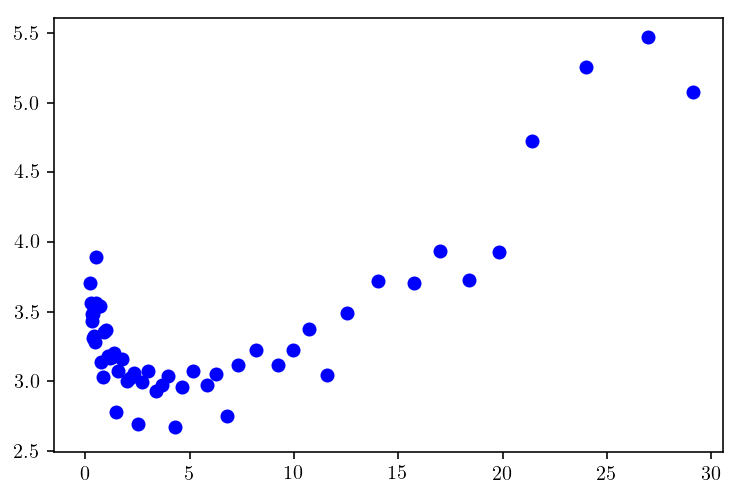

In [23]:
relatives = []
for i in range(len(tk2)):
    relatives.append([tk2[i][0]/tk2[i][1]])
for i in range(len(relatives)):
    try: plt.scatter(k2[i][0],relatives[i][0],c='b')
    except: continue

#### Thomson scattering rate

In [32]:
n2_limits

$\sigma_0$ analytical ($cm^2$)  $\sigma_0$ super conservative ($cm^2$)  \
0                    1.846425e-27                            3.500000e-26   
1                    3.370064e-25                            1.500000e-23   
2                    4.347013e-23                            9.800000e-22   

   Mass (GeV)  
0      0.0001  
1      0.0100  
2      1.0000

In [64]:
vds0.z_kin(1.8e-27,0.0001,2)

array([4588277.22300078])

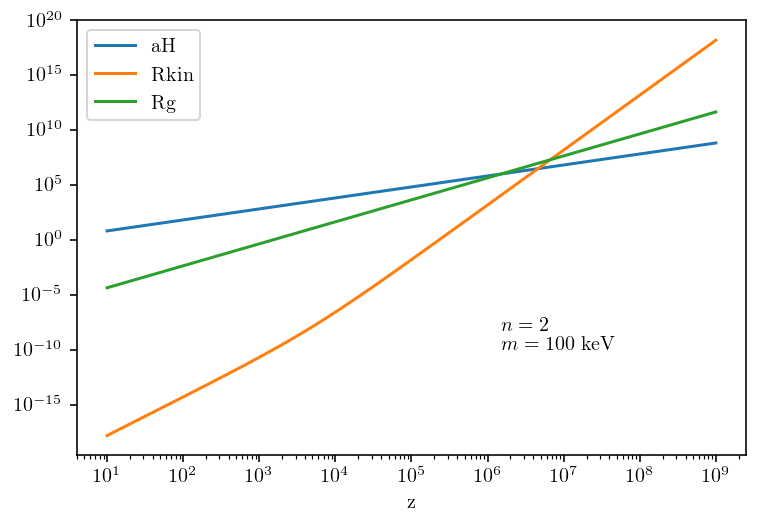

In [74]:
# zB4 = np.logspace(np.log10(zth),np.log10(100.*zth),500)
# zAFTER = np.logspace(np.log10(zth/100.),np.log10(zth),500)

plt.plot(z,vds0.aH(z,1.8e-27,0.0001,2),label="aH")
plt.plot(z,vds0.Rx_kin(z,1.8e-27,0.0001,2),label="Rkin")
# plt.plot(z,vds0.Rx_th(z,2e-27,0.0001,2),label="Rth")
plt.plot(z,vds0.Rgamma(z),label="Rg")
# plt.xlim(1e6,6e6)
# plt.ylim(1e2,1e8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.text(1.5e6,1e-10,"$n=2$\n$m=100$ keV")
plt.legend()